## importing libraries


In [14]:
# general purpose libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split 
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , recall_score , precision_score , f1_score

%matplotlib inline

In [15]:
# to hide any warnings

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)

In [16]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Column Definitions
According to the author of the Kaggle dataset and the ["Notes to accompany Daily Weather Observations"](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml) published by the Australian Bureau of Meteorology, the meanings and units for each of the columns in the dataset are as follows:

| **Column Name** | **Definition** | **Units** |
| --------------- | -------------- | --------- |
| `Date` | Date of the observation | N/A |
| `Location` | Location of the weather station | N/A |
| `MinTemp` | Minimum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `MaxTemp` | Maximum temperature in the 24 hours to 9am. Sometimes only known to the nearest whole degree | Degrees Celsius |
| `Rainfall` | Precipitation (rainfall) in the 24 hours to 9am. Sometimes only known to the nearest whole millimeter | Millimeters |
| `Evaporation` | "Class A" pan evaporation in the 24 hours to 9am | Millimeters |
| `Sunshine` | Bright sunshine in the 24 hours to midnight | Hours |
| `WindGustDir` | Direction of the strongest wind gust in the 24 hours to midnight | 16 compass points |
| `WindGustSpeed` | Speed of the strongest wind gust in the 24 hours to midnight | Kilometers per hour |
| `WindDir9am` | Direction of the wind at 9am | 16 compass points |
| `WindDir3pm` | Direction of the wind at 3pm | 16 compass points |
| `WindSpeed9am` | Speed of the wind at 9am | Kilometers per hour |
| `WindSpeed3pm` | Speed of the wind at 3pm | Kilometers per hour |
| `Humidity9am` | Relative humidity at 9am | Percent |
| `Humidity3pm` | Relative humidity at 3pm | Percent |
| `Pressure9am` | Atmospheric pressure reduced to mean sea level at 9am | Hectopascals |
| `Pressure3pm` | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascals |
| `Cloud9am` | Fraction of sky obscured by cloud at 9am | Eighths |
| `Cloud3pm` | Fraction of sky obscured by cloud at 3pm | Eighths |
| `Temp9am` | Temparature at 9am | Degrees Celsius |
| `Temp3pm` | Temparature at 3am | Degrees Celsius |
| `RainToday` | Did the current day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |
| `RainTomorrow` | Did the next day receive precipitation exceeding 1mm in the 24 hours to 9am | Binary (0 = No, 1 = Yes) |

In [17]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [18]:
df.shape

(145460, 23)

In [19]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [20]:
df.select_dtypes(exclude="object").describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [21]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [22]:
df.isnull().sum() / 145460 * 100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

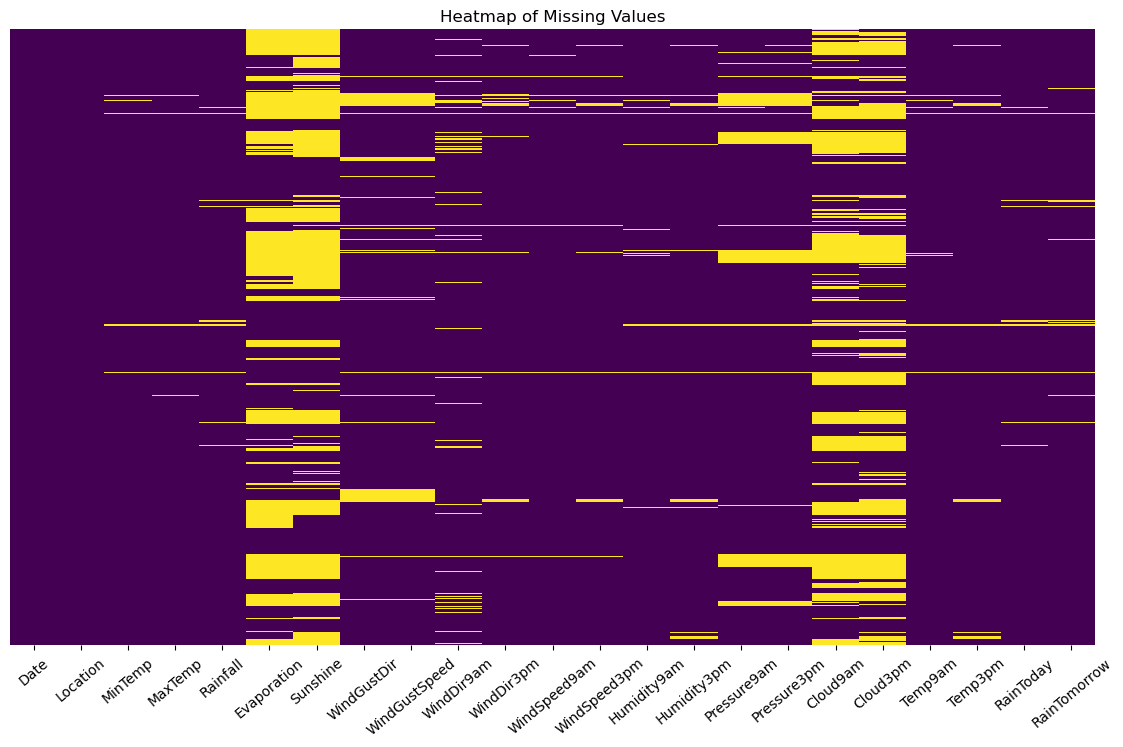

In [23]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.xticks(rotation=40)
plt.title("Heatmap of Missing Values")
plt.show()

In [24]:
missing = df.isnull().sum() / df.shape[0] * 100

missing_table = pd.DataFrame(missing[missing < 8].sort_values()).reset_index()
missing_table.columns = ['Column', 'Missing Percentage']

print(missing_table)

           Column  Missing Percentage
0            Date            0.000000
1        Location            0.000000
2         MaxTemp            0.866905
3         MinTemp            1.020899
4         Temp9am            1.214767
5    WindSpeed9am            1.214767
6     Humidity9am            1.824557
7    WindSpeed3pm            2.105046
8        Rainfall            2.241853
9       RainToday            2.241853
10   RainTomorrow            2.245978
11        Temp3pm            2.481094
12     WindDir3pm            2.906641
13    Humidity3pm            3.098446
14  WindGustSpeed            7.055548
15    WindGustDir            7.098859
16     WindDir9am            7.263853


### **Imputing missing values**

In [25]:
unique_location = df["Location"].unique()

for column in df.select_dtypes(exclude="object"):
    if df[column].isnull().any():
        for location in unique_location:
            location_median = df[df["Location"] == location][column].median()
            df.loc[df["Location"] == location, column] = df[df["Location"] == location][
                column
            ].fillna(location_median)
    elif df.select_dtypes(include="object"):
        for location in unique_location:
            location_mode = df[df["Location"] == location][column].mode()[0]
            df.loc[df["Location"] == location, column] = df[df["Location"] == location][
                column
            ].fillna(location_mode)

In [26]:
df.isna().sum() / len(df) * 100

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation      31.287639
Sunshine         36.552317
WindGustDir       7.098859
WindGustSpeed     4.179156
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       8.331500
Pressure3pm       8.331500
Cloud9am         24.038911
Cloud3pm         24.038911
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [27]:
df.select_dtypes(exclude="O")

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,8.0,7.0,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,8.0,7.0,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,5.0,10.1,22.4
145456,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,5.0,10.9,24.5
145457,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,5.0,12.5,26.1
145458,7.8,27.0,0.0,NaN,NaN,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


In [28]:
df.dropna(
    subset=[
        "WindGustDir",
        "WindGustSpeed",
        "WindDir9am",
        "WindDir3pm",
        "Pressure9am",
        "Pressure3pm",
        "RainToday",
        "RainTomorrow",
        "Evaporation",
        "Sunshine",
        "Cloud9am",
        "Cloud3pm",
    ],
    inplace=True,
    axis=0,
)

In [29]:
df.reset_index(drop=True, inplace=True)

In [30]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### **Featue Enfineering**


In [31]:
df.Date.dtype

dtype('O')

In [32]:
df["Date"] = pd.to_datetime(df["Date"])

In [33]:
df["day"] = df["Date"].dt.day
df["month"] = df["Date"].dt.month
df["year"] = df["Date"].dt.year

In [34]:
df.drop(["Date"], axis=1, inplace=True)

In [35]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [36]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,1,1,2009
1,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,2,1,2009
2,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,4,1,2009
3,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,5,1,2009
4,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,6,1,2009


## **EDA**


In [37]:
df.nunique().sort_values(ascending=True)

RainTomorrow       2
RainToday          2
Cloud3pm          10
year              11
Cloud9am          11
month             12
WindGustDir       16
WindDir3pm        16
WindDir9am        16
Location          26
day               31
WindSpeed9am      37
WindSpeed3pm      38
WindGustSpeed     64
Humidity3pm      101
Humidity9am      101
Sunshine         146
Evaporation      341
MinTemp          370
Temp9am          388
MaxTemp          400
Temp3pm          403
Pressure3pm      522
Pressure9am      526
Rainfall         576
dtype: int64

In [38]:
df.year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007, 2008])

In [39]:
df.year.value_counts().sort_index()

year
2007      61
2008    1338
2009    8574
2010    8693
2011    8008
2012    8117
2013    8165
2014    8531
2015    8473
2016    8718
2017    4188
Name: count, dtype: int64

> The data is collected from the 26 cities of Australia over the period of 11 years which starts from 2007 to 2017.


In [40]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'day', 'month', 'year'],
      dtype='object')

In [41]:
df.Location.nunique()

26

In [42]:
df.Location.value_counts().sort_index()

Location
AliceSprings        2748
Brisbane            3029
Cairns              2900
Canberra            2762
Cobar               2925
CoffsHarbour        2568
Darwin              3119
Hobart              3106
Melbourne           2240
MelbourneAirport    2943
Mildura             2903
Moree               2635
MountGambier        2898
NorfolkIsland       2868
Nuriootpa           2812
Perth               3049
PerthAirport        2924
Portland            2890
Sale                2771
Sydney              2285
SydneyAirport       2941
Townsville          2884
WaggaWagga          2801
Watsonia            2745
Williamtown         2203
Woomera             2917
Name: count, dtype: int64

## **`Temp` columns**


### **MinTemp**


**Lowest temp**


In [43]:
df.groupby(["Location", "year", "month", "day"])["MinTemp"].min().sort_values(
    ascending=True
).head()

Location  year  month  day
Canberra  2014  8      5     -7.6
          2015  6      2     -7.0
          2011  5      15    -6.9
          2012  9      1     -6.8
          2011  7      30    -6.7
Name: MinTemp, dtype: float64

In [44]:
df["MinTemp"].describe()

count    72866.000000
mean        13.125480
std          6.464502
min         -7.600000
25%          8.200000
50%         12.900000
75%         18.000000
max         31.900000
Name: MinTemp, dtype: float64

In [45]:
df.MinTemp.nunique()

370

In [46]:
mean_MinTemp = df["MinTemp"].mean()

# Location with avg MinTemp
df.loc[df["MinTemp"] == mean_MinTemp.round(1)][
    ["MinTemp", "Location", "year", "month"]
].sort_values(by="Location")

,MinTemp,Location,year,month
68366,13.1,AliceSprings,2013,4
69481,13.1,AliceSprings,2016,8
69419,13.1,AliceSprings,2016,6
68607,13.1,AliceSprings,2014,1
68551,13.1,AliceSprings,2013,11
...,...,...,...,...
55093,13.1,Woomera,2009,4
57496,13.1,Woomera,2016,4
57694,13.1,Woomera,2016,10
55076,13.1,Woomera,2009,3


_Observation_

- Average MinTemp is 13.12
- The range of MinTemp lies between -7.6 to 31.9
- Cannebra is the coldest city in Australia with MinTemp of -7.6


### **MaxTemp**


In [47]:
df.MaxTemp.describe()

count    72866.000000
mean        24.064079
std          7.015507
min          4.100000
25%         18.500000
50%         23.700000
75%         29.400000
max         48.100000
Name: MaxTemp, dtype: float64

In [48]:
df.MaxTemp.nunique()

400

In [49]:
grouped_df = df.groupby(["Location", "year", "month"])["MaxTemp"].max().reset_index()
grouped_df.sort_values(by="MaxTemp", ascending=False).head()

,Location,year,month,MaxTemp
2493,Woomera,2011,1,48.1
1192,Moree,2017,2,47.3
1155,Moree,2014,1,47.3
901,MelbourneAirport,2009,2,46.8
2563,Woomera,2017,2,46.8


_Observation:_

- `Woomera` is the hottest city in Australia with the `MaxTemp` of 48.1 in 2011


## **`Rainfall` column**


In [50]:
df.Rainfall.describe()

count    72866.000000
mean         2.378084
std          9.085335
min          0.000000
25%          0.000000
50%          0.000000
75%          0.600000
max        367.600000
Name: Rainfall, dtype: float64

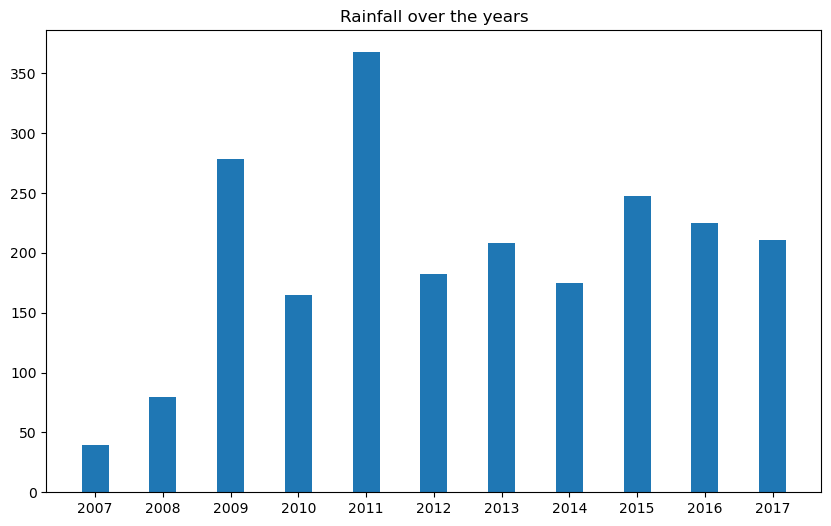

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(df.year, df.Rainfall, width=0.4)
plt.xticks(np.arange(2007, 2018, 1))
plt.title("Rainfall over the years")
plt.show()

In [52]:
max_rainfall = df["Rainfall"].max()
df[df["Rainfall"] == max_rainfall][["Location", "Rainfall", "year", "month"]]

,Location,Rainfall,year,month
70689,Darwin,367.6,2011,2


**Observation:**

- Average Rainfall for the period when data collected is 2.37 mm
- Darwin experience is highest amount of Rainfall in 2nd month of 2011 which recorded as 367.6 mm
- Data shows highest Rainfall occured in 2011 followed by 2009 and 2015.


## **`Sunshine` column**


In [53]:
df.Sunshine.nunique()

146

In [54]:
df.Sunshine.describe()

count    72866.000000
mean         7.874997
std          3.505031
min          0.000000
25%          5.900000
50%          8.600000
75%         10.400000
max         14.500000
Name: Sunshine, dtype: float64

### Tallest Sunshine With Location


In [55]:
max_sunshine = df["Sunshine"].max()
df.loc[df["Sunshine"] == max_sunshine][
    ["Location", "Sunshine", "year", "month"]
].sort_values(ascending=False, by="Location")

,Location,Sunshine,year,month
34322,Mildura,14.5,2015,12


In [56]:
df.groupby(["Location", "year", "month"])["Sunshine"].max().reset_index().sort_values(
    ascending=False, by="Sunshine"
).head(10)

,Location,year,month,Sunshine
1079,Mildura,2015,12,14.5
1430,Nuriootpa,2011,12,14.3
1210,MountGambier,2010,1,14.3
1711,Portland,2010,1,14.3
2469,Woomera,2009,1,14.2
733,Hobart,2010,11,14.2
2240,WaggaWagga,2014,12,14.1
1488,Nuriootpa,2016,12,14.1
1767,Portland,2014,12,14.1
1429,Nuriootpa,2011,11,14.1


### Shortest Sunshine with location


In [57]:
df.groupby(["Location", "year", "month"])["Sunshine"].min().reset_index().sort_values(
    ascending=True, by="Sunshine"
).head(10)

,Location,year,month,Sunshine
2567,Woomera,2017,6,0.0
1639,PerthAirport,2012,5,0.0
769,Hobart,2014,2,0.0
770,Hobart,2014,3,0.0
771,Hobart,2014,4,0.0
1638,PerthAirport,2012,4,0.0
773,Hobart,2014,6,0.0
1636,PerthAirport,2012,2,0.0
1632,PerthAirport,2011,10,0.0
1629,PerthAirport,2011,7,0.0


**Observation:**

- Sunshine column has 146 unique values
- Longest Sunshine observed is 14.5 hours in Mildura city in 2015 in the month of December
- The average hours of sunshine observed is 7.87 with 50% areas have experience more than 8 hours of sunshine
- Womera , Perth and Hobart has experience no sunshine in 2017 , 2012 and 2014 respectively for the particular months of June, May and Feburary


## **`Cloud9am` column**


In [58]:
df.Cloud9am.unique()

array([2. , 1. , 8. , 3. , 0. , 4. , 7. , 5. , 6. , 4.5, 9. ])

In [59]:
df.Cloud9am.value_counts()

Cloud9am
7.0    16776
1.0    13027
6.0     8757
8.0     8320
0.0     6317
2.0     5881
3.0     4936
5.0     4853
4.0     3458
4.5      540
9.0        1
Name: count, dtype: int64

In [60]:
df.Cloud9am.describe()

count    72866.000000
mean         4.345881
std          2.777711
min          0.000000
25%          1.000000
50%          5.000000
75%          7.000000
max          9.000000
Name: Cloud9am, dtype: float64

### **`Location` with highest `cloud9am` oktas in the year**


In [61]:
df.groupby(["Location", "year", "month"])["Cloud9am"].max().reset_index().sort_values(
    ascending=False, by="Cloud9am"
).head(10)

,Location,year,month,Cloud9am
351,Canberra,2012,5,9.0
0,AliceSprings,2008,12,8.0
1608,PerthAirport,2009,9,8.0
1610,PerthAirport,2009,11,8.0
1613,PerthAirport,2010,2,8.0
1614,PerthAirport,2010,3,8.0
1615,PerthAirport,2010,4,8.0
1617,PerthAirport,2010,6,8.0
1619,PerthAirport,2010,8,8.0
1620,PerthAirport,2010,9,8.0


In [62]:
df.groupby(["Location", "year", "month"])["Cloud9am"].min().reset_index().sort_values(
    ascending=True, by="Cloud9am"
).head(10)

,Location,year,month,Cloud9am
0,AliceSprings,2008,12,0.0
1513,Perth,2010,1,0.0
1512,Perth,2009,12,0.0
1511,Perth,2009,11,0.0
1510,Perth,2009,10,0.0
1507,Perth,2009,7,0.0
1506,Perth,2009,6,0.0
1505,Perth,2009,5,0.0
1504,Perth,2009,4,0.0
1503,Perth,2009,3,0.0


**Observations:**

- The `Cloud9am` column has 11 unique values ranges from 0 to 9
- 0 means no cloud whereas 9 means overcast
- The average `cloud9am` observed is 4.34 with 50% areas have experience 5 oktas
- `Canberra` is the only location with the cloud9am oktas of 9 in the whole year in the month of May in our dataset


## **Visualizations**

<Axes: ylabel='count'>

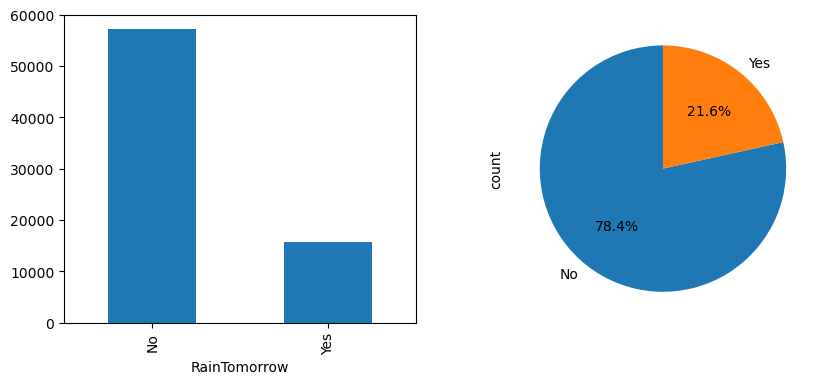

In [63]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['RainTomorrow'].value_counts().plot(kind='bar', ax=axs[0])
df['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 90, ax=axs[1])


In [64]:
print("Unique locations and their counts :")
location = df["Location"].value_counts()
location = location.reset_index()
location.columns= ["Location", "Counts"]
print(location)

Unique locations and their counts :
            Location  Counts
0             Darwin    3119
1             Hobart    3106
2              Perth    3049
3           Brisbane    3029
4   MelbourneAirport    2943
5      SydneyAirport    2941
6              Cobar    2925
7       PerthAirport    2924
8            Woomera    2917
9            Mildura    2903
10            Cairns    2900
11      MountGambier    2898
12          Portland    2890
13        Townsville    2884
14     NorfolkIsland    2868
15         Nuriootpa    2812
16        WaggaWagga    2801
17              Sale    2771
18          Canberra    2762
19      AliceSprings    2748
20          Watsonia    2745
21             Moree    2635
22      CoffsHarbour    2568
23            Sydney    2285
24         Melbourne    2240
25       Williamtown    2203


In [65]:
import plotly.express as px

fig = px.treemap(location, path=['Location'], values='Counts', color='Counts', title="Arrangement Of Locations By Counts From Highest To Lowest")

# Displaying Treemap plot
fig.show()

**Observation:-**

Most occured location is Canberra followed by Sydney.
Most of the locations have a frequency near 3000.
Nhil, Katherine and Uluru have occured the least.

In [66]:
# Highest and Lowest Minimum temperatures in degrees celsius
print("Highest Minimum temperatures in degrees celsius : ", max(df["MinTemp"]))
print("Lowest Minimum temperatures in degrees celsius : ", min(df["MinTemp"]))

Highest Minimum temperatures in degrees celsius :  31.9
Lowest Minimum temperatures in degrees celsius :  -7.6


Text(0.5, 1.0, 'Maximum Temperature')

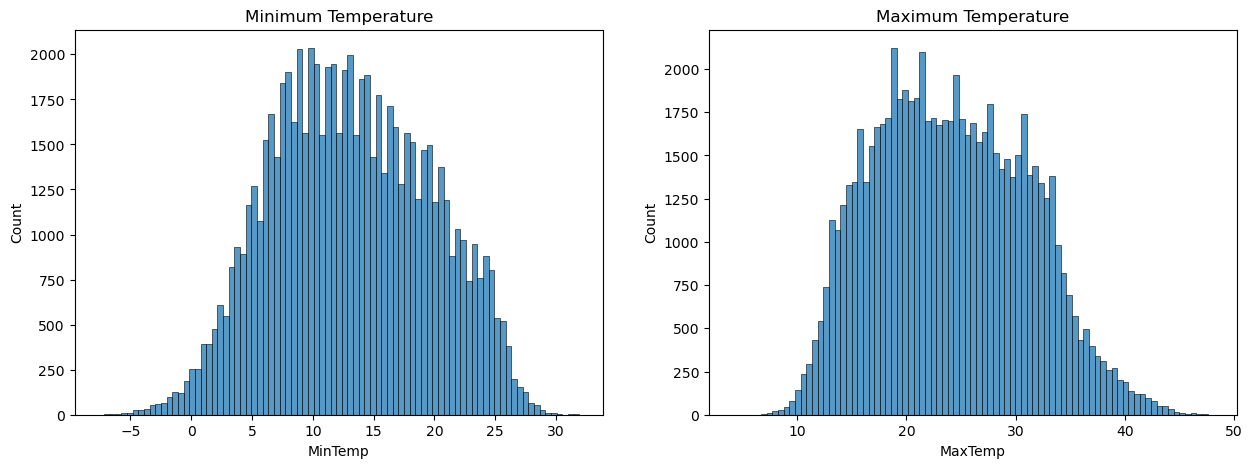

In [67]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15,5))

# MinTemp
sns.histplot(df['MinTemp'], ax=ax[0])
ax[0].set_title("Minimum Temperature")

# MaxTemp
sns.histplot(df['MaxTemp'], ax=ax[1])
ax[1].set_title("Maximum Temperature")

**Observation:-**

- Highest concentration of points for minimum temperature is between 10 to 12 degree Celcius.
- Highest concentration of points for maximum temperature is between 18 to 22 degree Celcius.

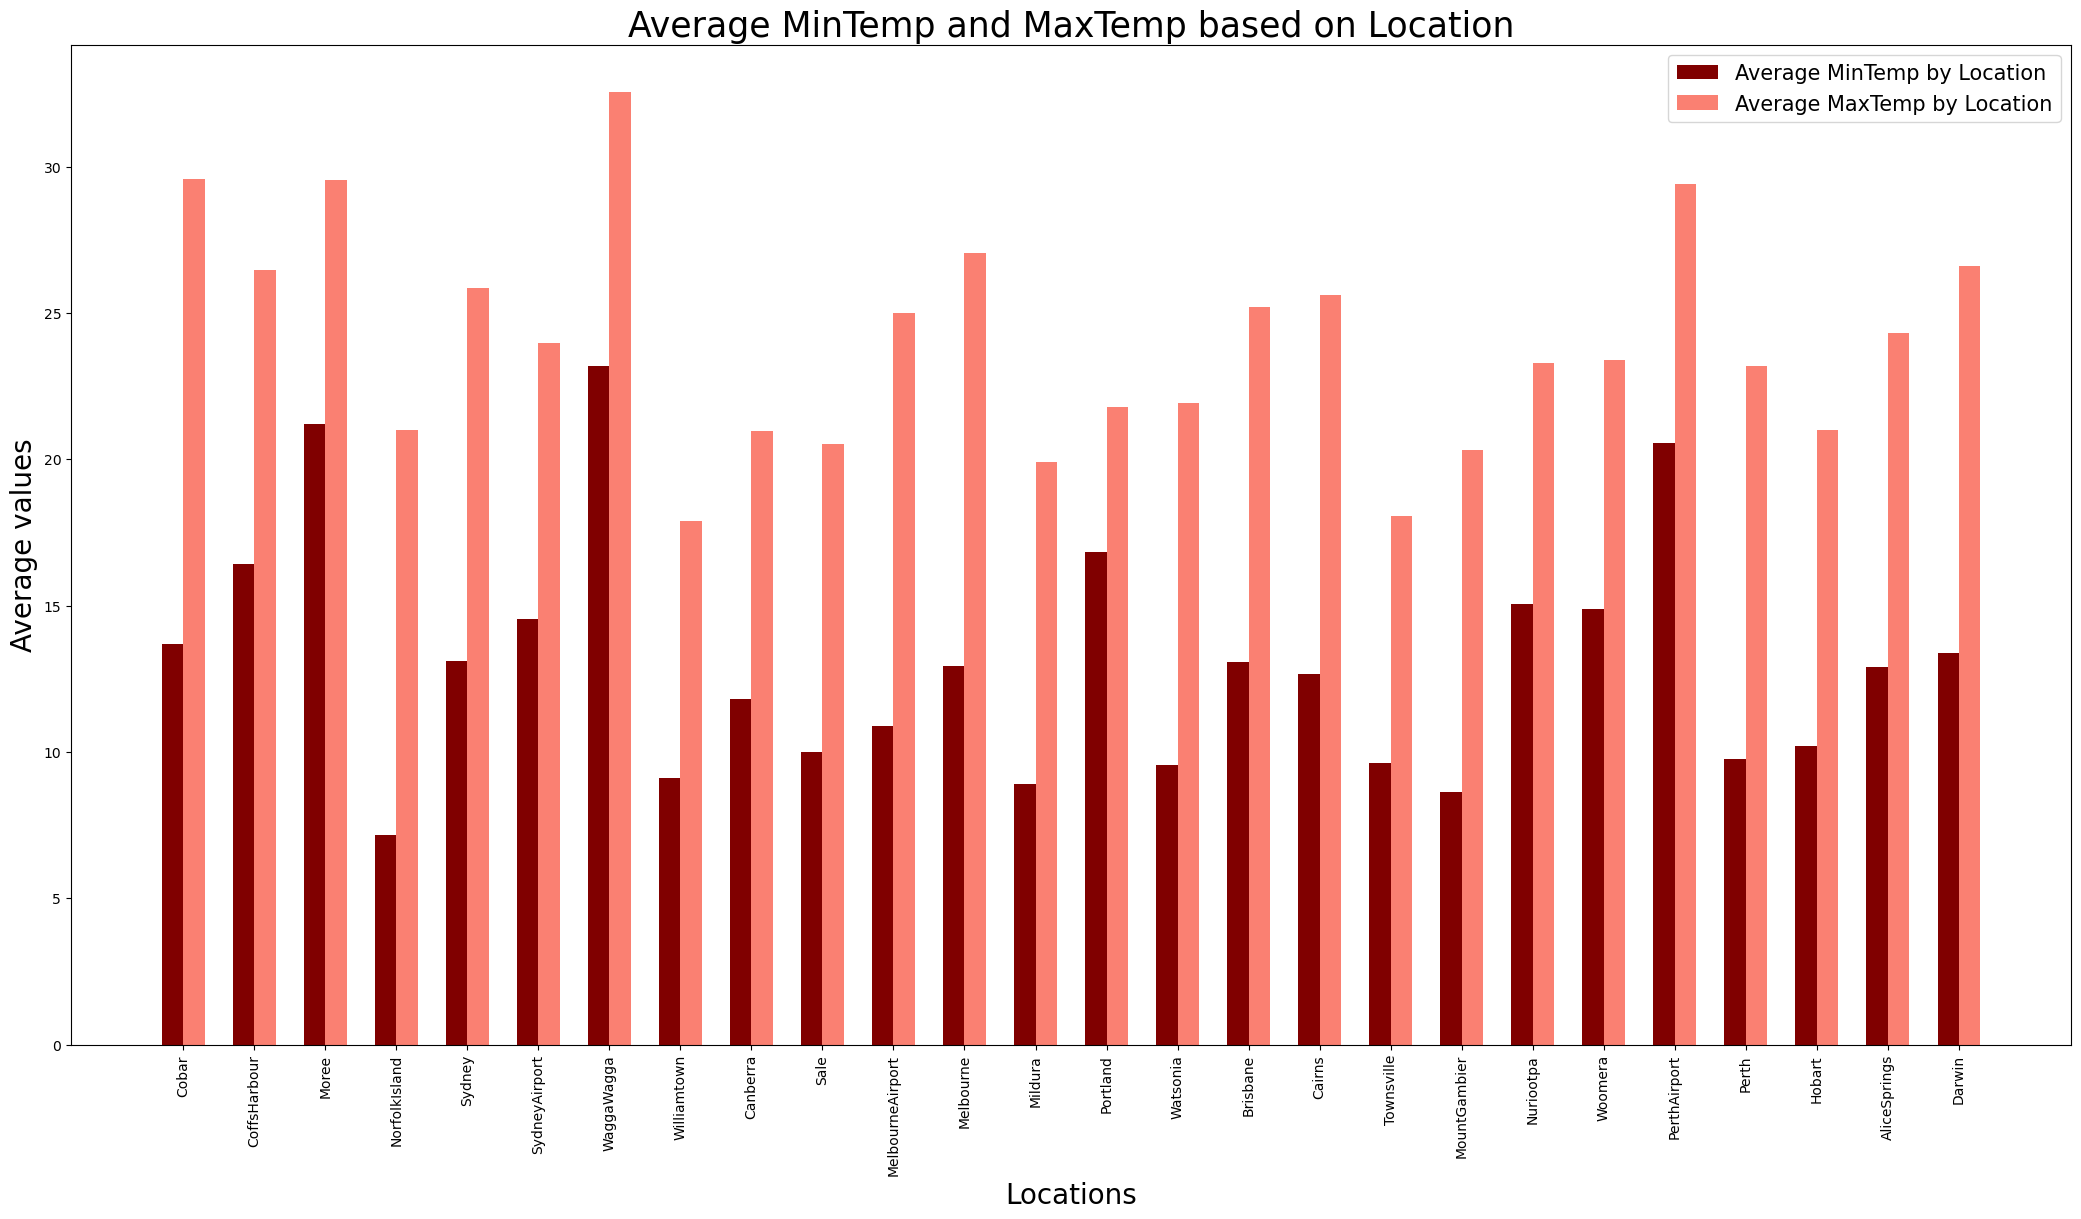

In [68]:
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (20,10)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

w = 0.3

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)

plt.xlabel('Locations', fontsize=20)
plt.ylabel('Average values', fontsize=20)
plt.title('Average MinTemp and MaxTemp based on Location', fontsize=25)
plt.legend(fontsize=15)

**Observation:-**

- The average maximum temperature is above 20 degree Celcius for most locations.
- The average minimum temperature is between 5 and 15 degree Celcius for most locations.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 800x400 with 0 Axes>

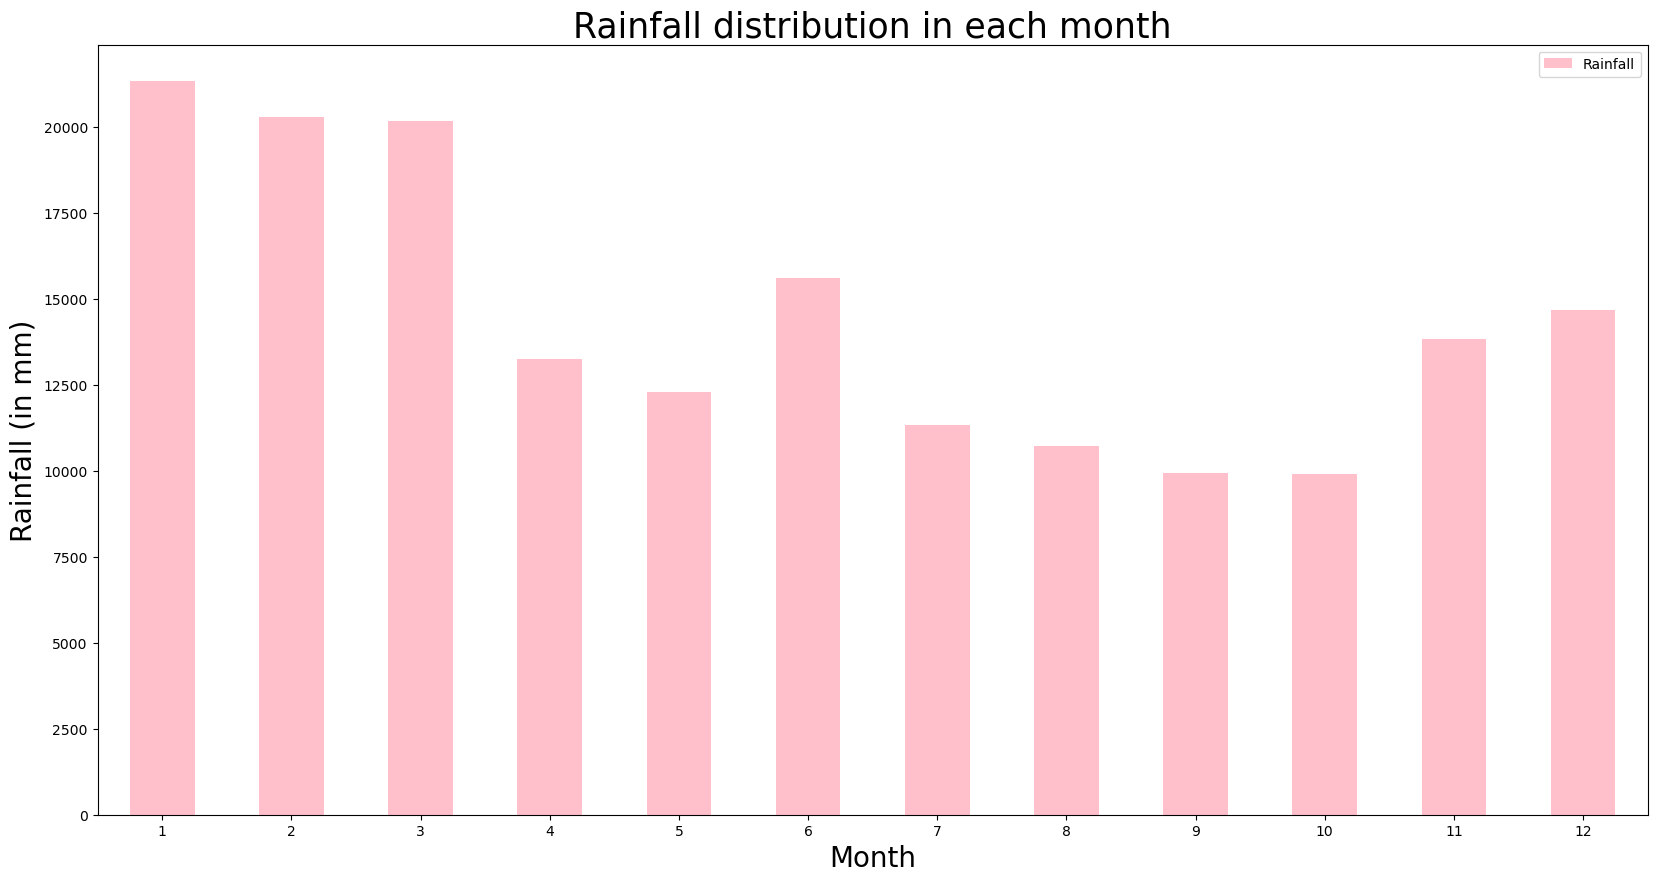

In [69]:
rainfall = [df['year'], df['month'], df['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rain_df = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(8,4))
a = rain_df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='pink')
plt.title('Rainfall distribution in each month', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

**Observation:-**

Maximum rainfall(greater than 35,000 mm) occurs in March.
January and June also experience high rainfall(nearly 35,000 mm) followed by February.
Minimum rainfall occurs in October followed by September.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

<Figure size 800x400 with 0 Axes>

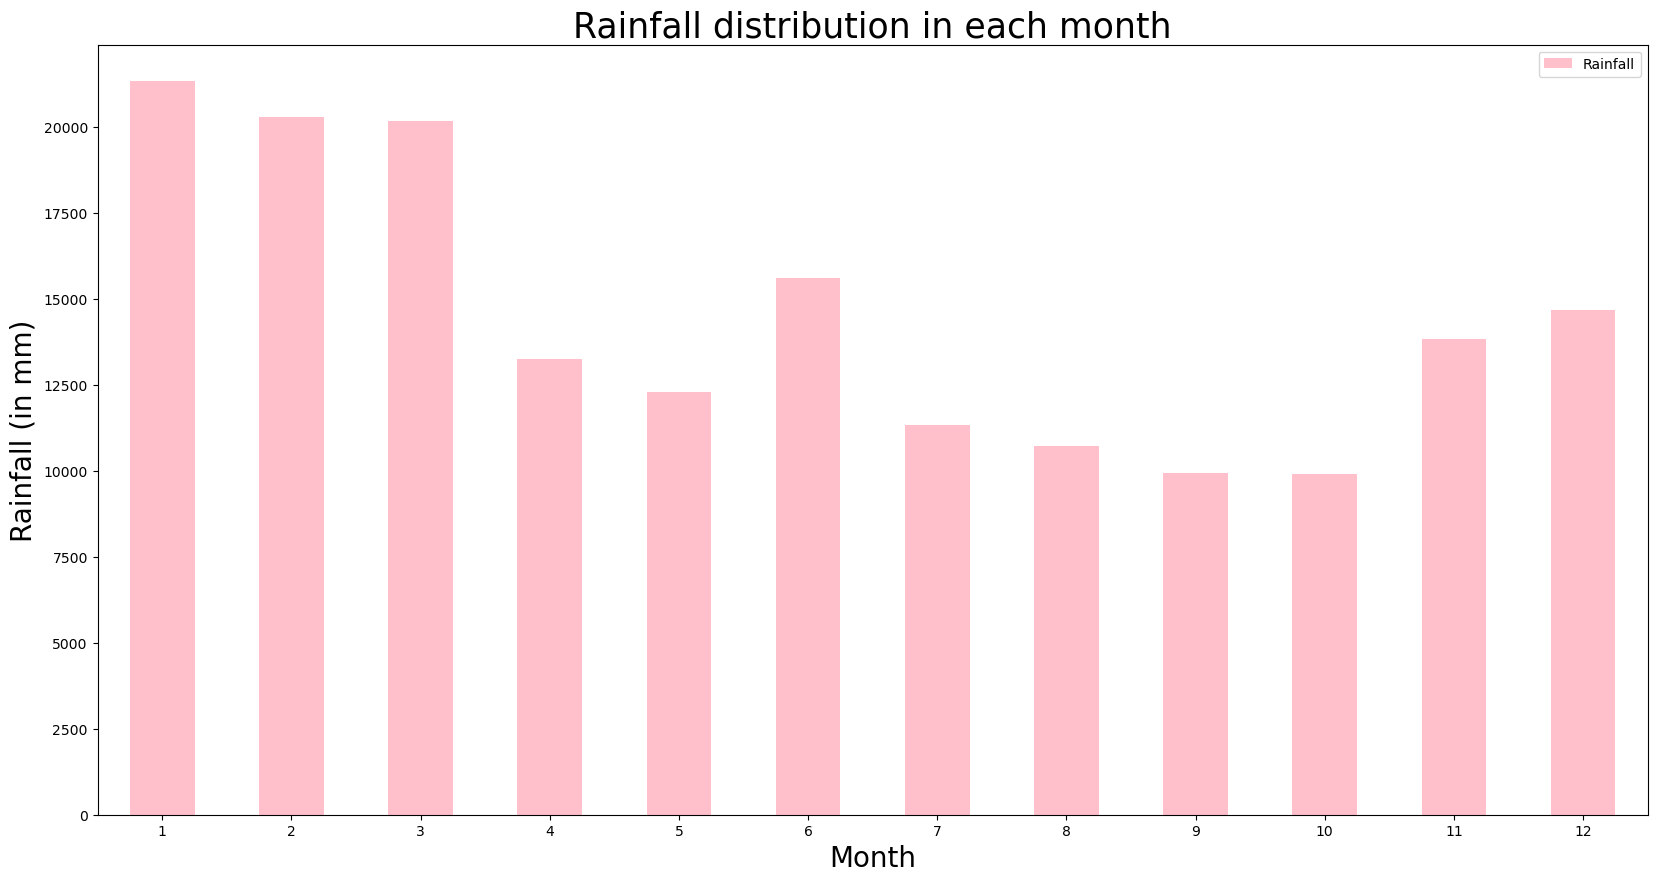

In [70]:
rainfall = [df['year'], df['month'], df['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rain_df = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(8,4))
a = rain_df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='pink')
plt.title('Rainfall distribution in each month', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

**Observation:-**

- Maximum rainfall(greater than 35,000 mm) occurs in january.
- Minimum rainfall occurs in October followed by September , October.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '2007'),
  Text(1, 0, '2008'),
  Text(2, 0, '2009'),
  Text(3, 0, '2010'),
  Text(4, 0, '2011'),
  Text(5, 0, '2012'),
  Text(6, 0, '2013'),
  Text(7, 0, '2014'),
  Text(8, 0, '2015'),
  Text(9, 0, '2016'),
  Text(10, 0, '2017')])

<Figure size 800x400 with 0 Axes>

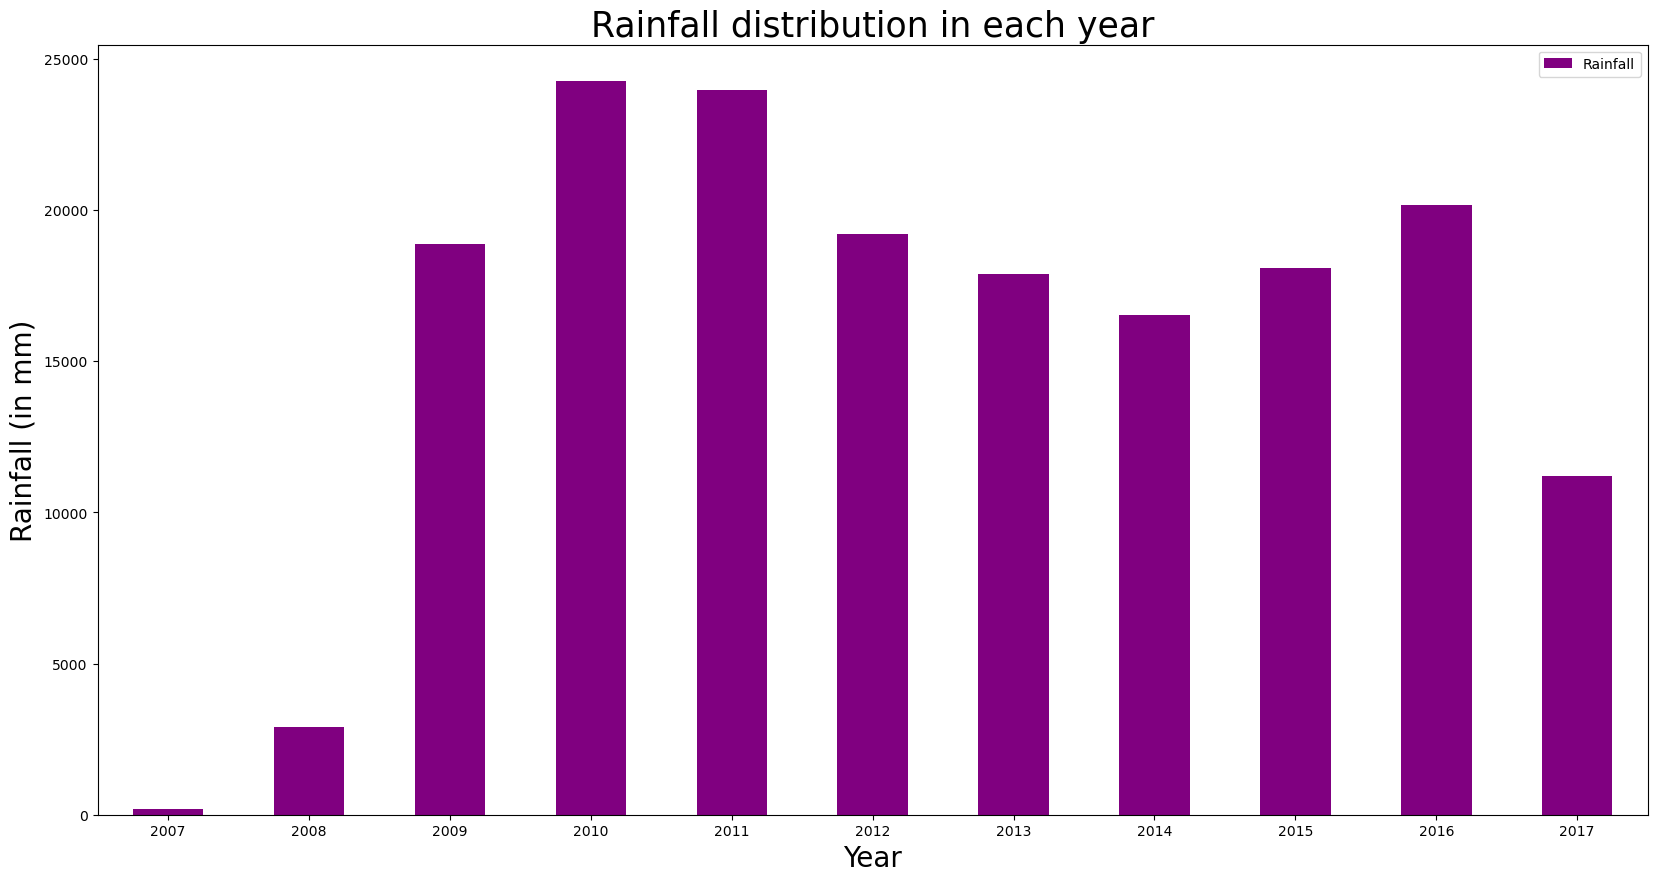

In [71]:
plt.figure(figsize=(8,4))
a = rain_df.groupby('Year').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='purple')
plt.title('Rainfall distribution in each year', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

**Observation:-**

- Maximum rainfall(greater than 24.000 mm) occured in 2010 followed by 2011 and 2016.
- 2009, 2012, 2013, 2014 and 2015 experienced rainfall between 15,000-20,000 mm.
- Least rainfall(less than 200 mm) occured in 2007 followed by 2008 and 2017.

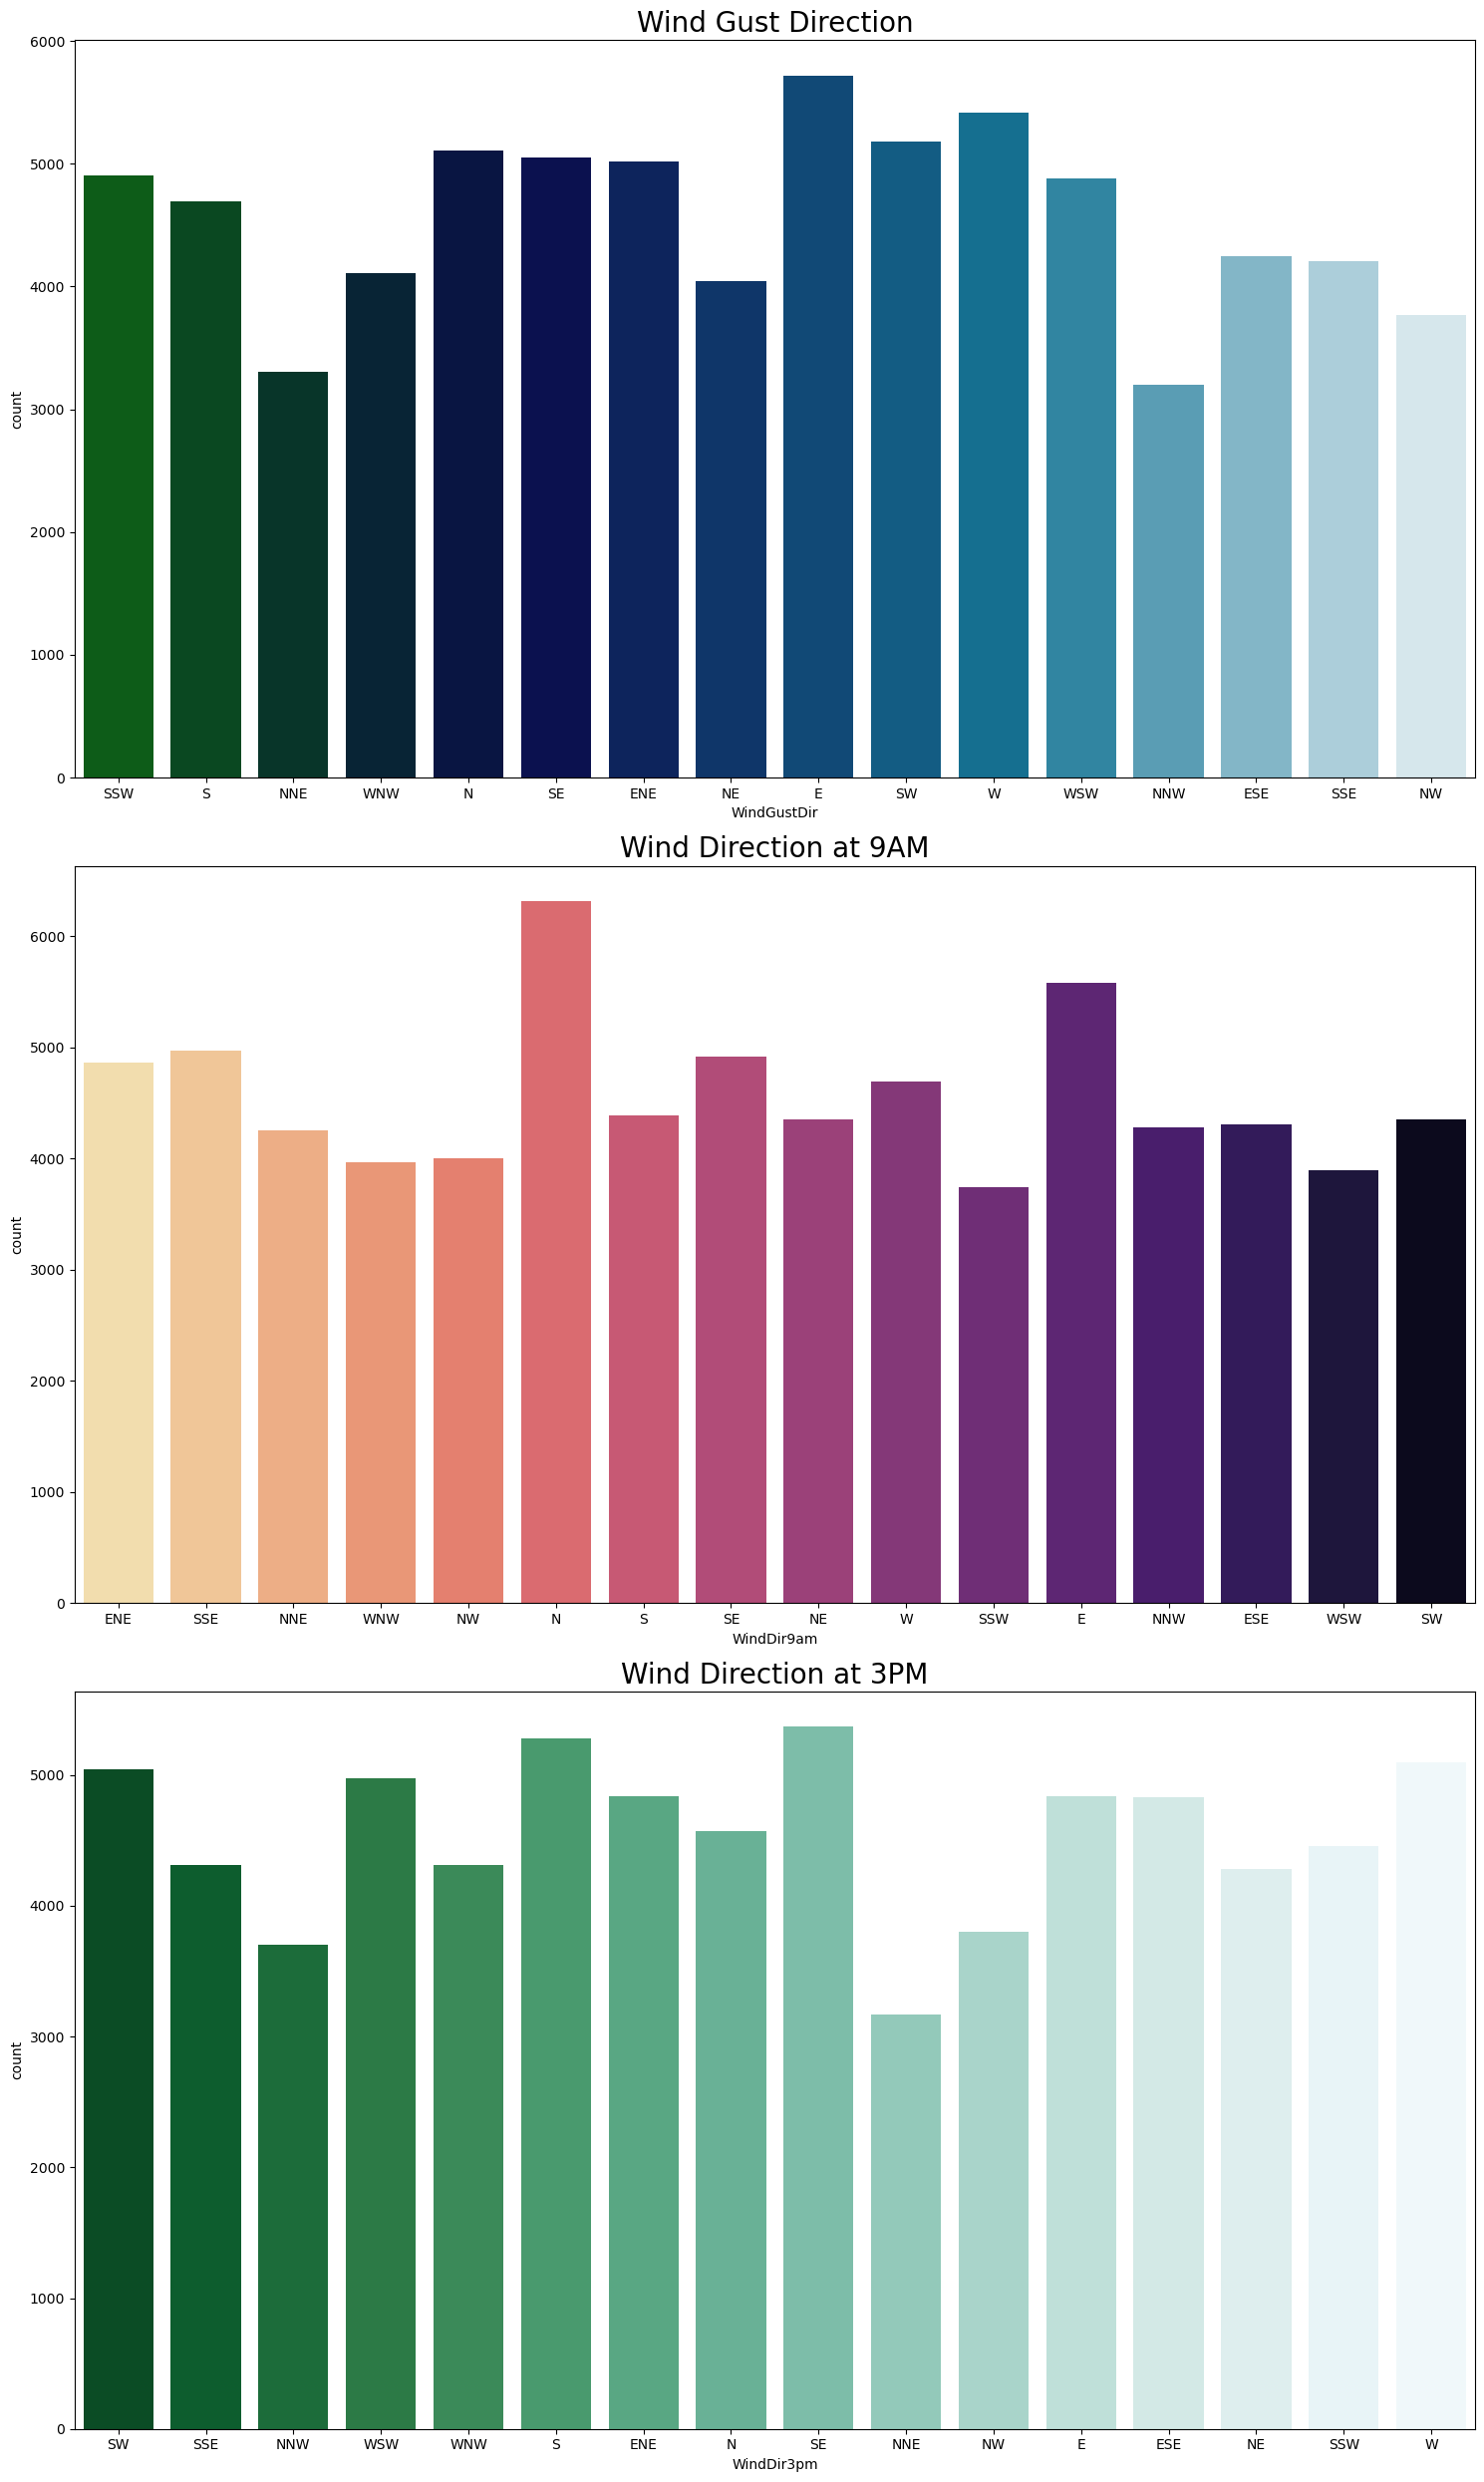

In [72]:
fig, ax = plt.subplots(3, 1, figsize=(15, 25))

# WindGustDir
sns.countplot(x=df['WindGustDir'], palette='ocean', ax=ax[0])  
ax[0].set_title("Wind Gust Direction", fontsize=20)

# WindDir9am
sns.countplot(x=df['WindDir9am'], palette='magma_r', ax=ax[1])  
ax[1].set_title("Wind Direction at 9AM", fontsize=20)

# WindDir3pm
sns.countplot(x=df['WindDir3pm'], palette='BuGn_r', ax=ax[2])  
ax[2].set_title("Wind Direction at 3PM", fontsize=20)

plt.tight_layout()  
plt.show()


**Observation:-**

- Wind Gust Direction for maximum records is West.
- Wind Direction at 9AM for maximum records is North followed by North-West and East.
- Wind Direction at 3PM for maximum records is South East.

<Axes: xlabel='WindGustSpeed', ylabel='Density'>

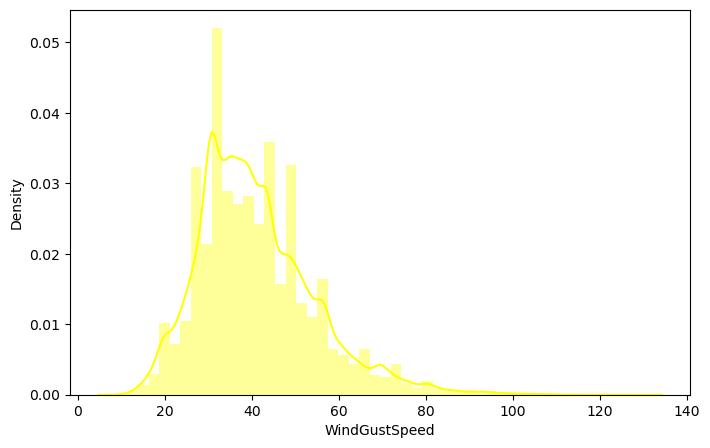

In [73]:
plt.figure(figsize=(8,5))
sns.distplot(df['WindGustSpeed'], hist=True, color='yellow')

**Observation:-**

- Wind Gust Speed ranges from 0 to nearly 140 km/hr.

Text(0.5, 1.0, 'Temperature at 3PM')

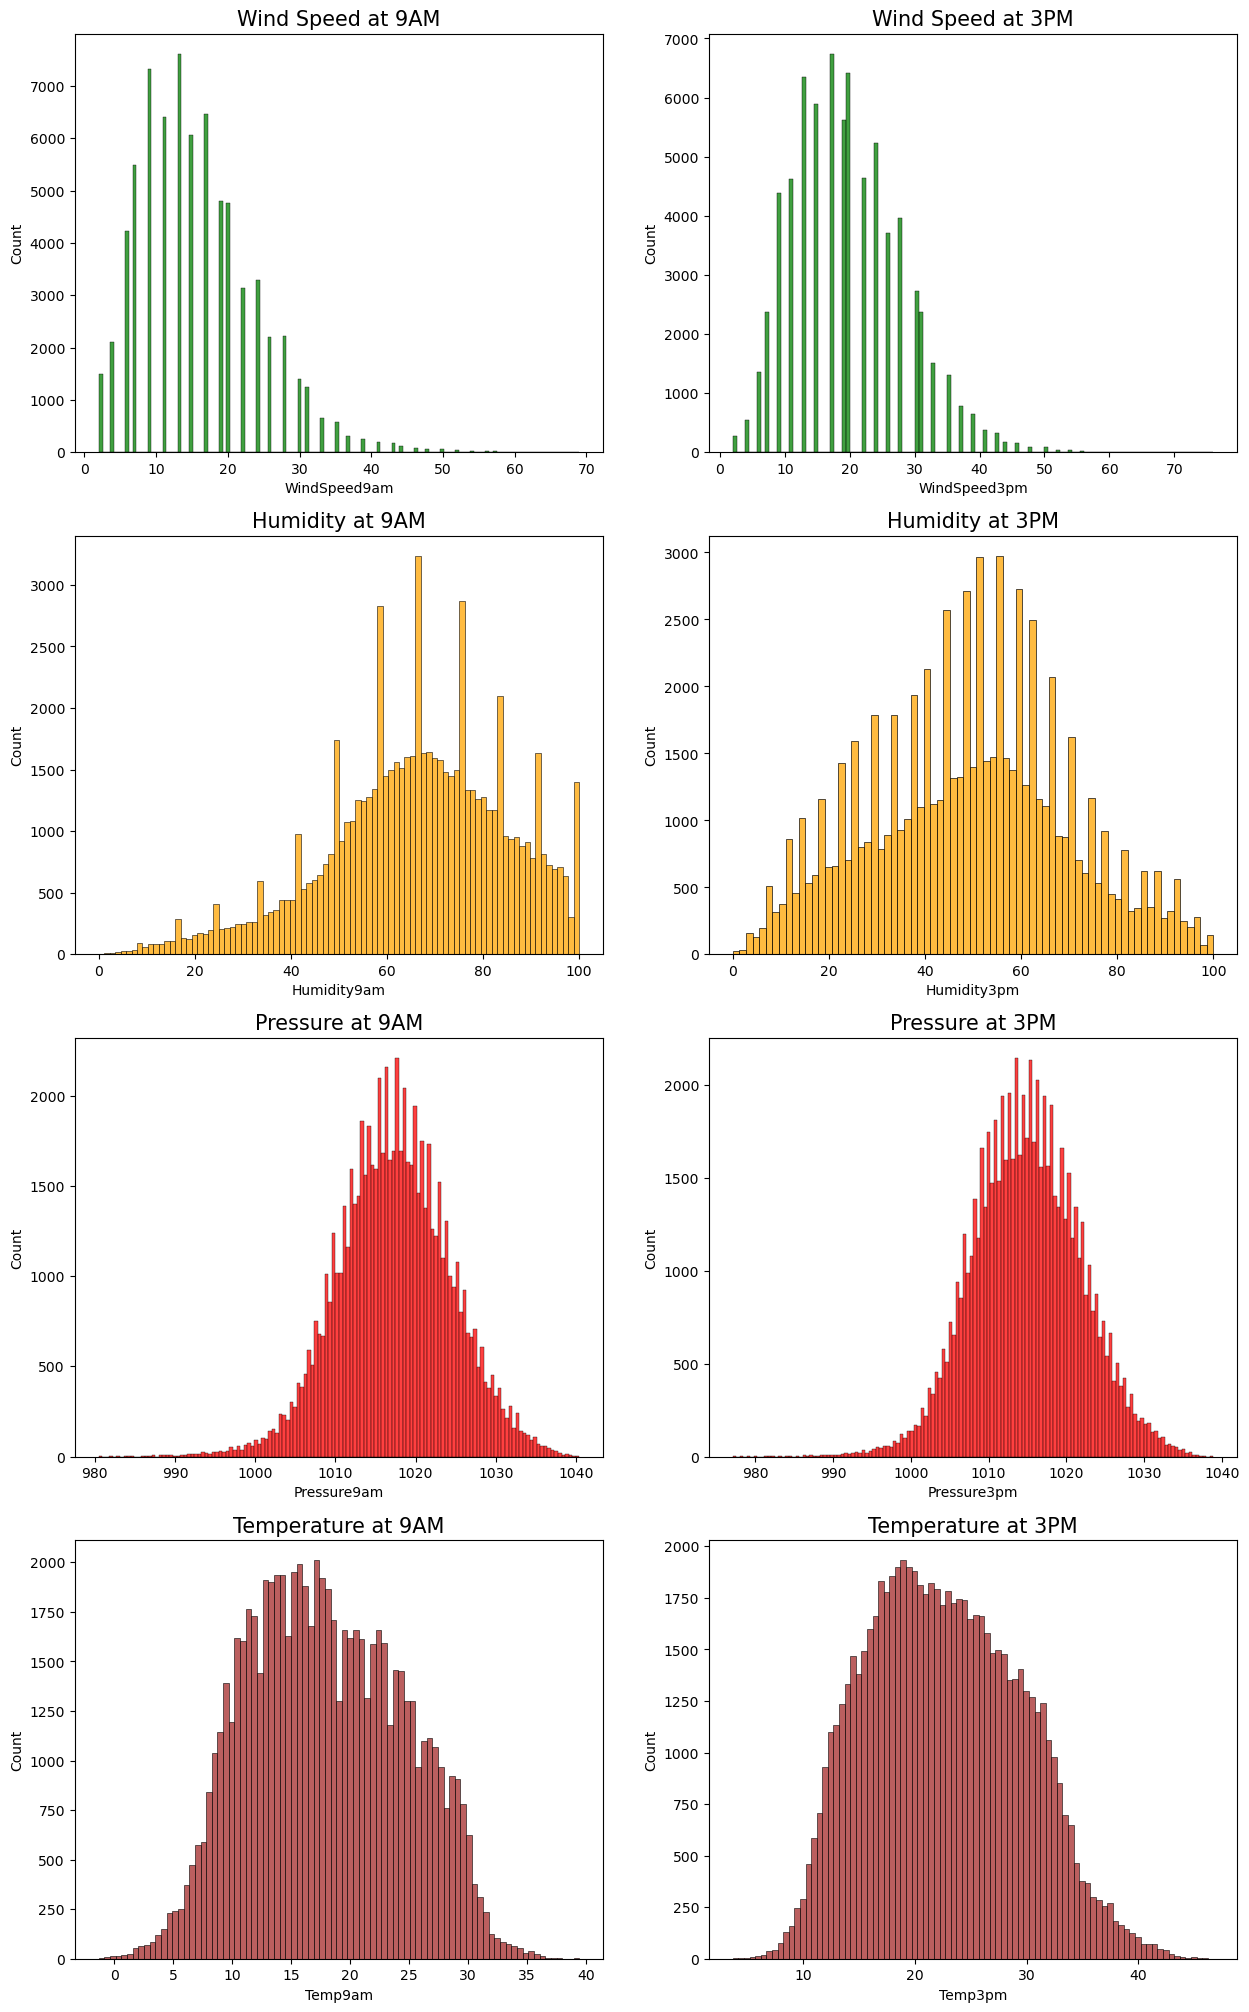

In [74]:
fig, ax = plt.subplots(4, 2, figsize=(15,25))

# WindSpeed9am
sns.histplot(df['WindSpeed9am'], ax=ax[0,0], color='green')
ax[0,0].set_title("Wind Speed at 9AM", fontsize=15)

# WindSpeed3pm
sns.histplot(df['WindSpeed3pm'], ax=ax[0,1], color='green')
ax[0,1].set_title("Wind Speed at 3PM", fontsize=15)

# Humidity9am
sns.histplot(df['Humidity9am'], ax=ax[1,0], color='orange')
ax[1,0].set_title("Humidity at 9AM", fontsize=15)

# Humidity3pm
sns.histplot(df['Humidity3pm'], ax=ax[1,1], color='orange')
ax[1,1].set_title("Humidity at 3PM", fontsize=15)

# Pressure9am
sns.histplot(df['Pressure9am'], ax=ax[2,0], color='red')
ax[2,0].set_title("Pressure at 9AM", fontsize=15)

# Pressure3pm
sns.histplot(df['Pressure3pm'], ax=ax[2,1], color='red')
ax[2,1].set_title("Pressure at 3PM", fontsize=15)

# Temp9am
sns.histplot(df['Temp9am'], ax=ax[3,0], color='brown')
ax[3,0].set_title("Temperature at 9AM", fontsize=15)

# Temp3pm
sns.histplot(df['Temp3pm'], ax=ax[3,1], color='brown')
ax[3,1].set_title("Temperature at 3PM", fontsize=15)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0.0, '0'),
  Text(0, 10000.0, '10000'),
  Text(0, 20000.0, '20000'),
  Text(0, 30000.0, '30000'),
  Text(0, 40000.0, '40000'),
  Text(0, 50000.0, '50000'),
  Text(0, 60000.0, '60000')])

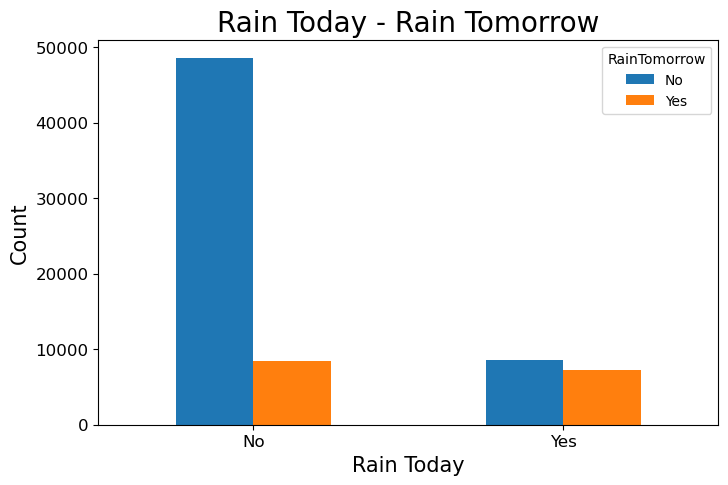

In [75]:
type_plt = pd.crosstab(df['RainToday'], df['RainTomorrow'])

plt.rcParams["figure.figsize"] = (8,5)

type_plt.plot(kind='bar',stacked=False)

plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Rain Today - Rain Tomorrow', fontsize=20)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72866 entries, 0 to 72865
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       72866 non-null  object 
 1   MinTemp        72866 non-null  float64
 2   MaxTemp        72866 non-null  float64
 3   Rainfall       72866 non-null  float64
 4   Evaporation    72866 non-null  float64
 5   Sunshine       72866 non-null  float64
 6   WindGustDir    72866 non-null  object 
 7   WindGustSpeed  72866 non-null  float64
 8   WindDir9am     72866 non-null  object 
 9   WindDir3pm     72866 non-null  object 
 10  WindSpeed9am   72866 non-null  float64
 11  WindSpeed3pm   72866 non-null  float64
 12  Humidity9am    72866 non-null  float64
 13  Humidity3pm    72866 non-null  float64
 14  Pressure9am    72866 non-null  float64
 15  Pressure3pm    72866 non-null  float64
 16  Cloud9am       72866 non-null  float64
 17  Cloud3pm       72866 non-null  float64
 18  Temp9a

**Observation:** 

There is a noticeable number of days with 0 hours of sunshine. This could indicate periods of heavy cloud cover, rain, or seasonal weather patterns in specific regions of Australia.

In [77]:
print("Unique wind gust directions and their counts :")
windgustdir = df["WindGustDir"].value_counts()
windgustdir = windgustdir.reset_index()
windgustdir.columns= ["Wind Gust Direction", "Counts"]
print(windgustdir)

Unique wind gust directions and their counts :
   Wind Gust Direction  Counts
0                    E    5721
1                    W    5419
2                   SW    5182
3                    N    5105
4                   SE    5055
5                  ENE    5019
6                  SSW    4909
7                  WSW    4884
8                    S    4691
9                  ESE    4244
10                 SSE    4205
11                 WNW    4113
12                  NE    4048
13                  NW    3765
14                 NNE    3308
15                 NNW    3198


In [78]:
print("Unique wind gust speed in km/hr and their counts :")
windgustspd = df["WindGustSpeed"].value_counts()
windgustspd = windgustspd.reset_index()
windgustspd.columns= ["Wind Gust Speed", "Counts"]
print(windgustspd)

Unique wind gust speed in km/hr and their counts :
    Wind Gust Speed  Counts
0              35.0    5109
1              39.0    4963
2              37.0    4779
3              31.0    4598
4              33.0    4576
..              ...     ...
59            124.0       2
60            120.0       1
61              9.0       1
62            130.0       1
63            126.0       1

[64 rows x 2 columns]


In [79]:
print("Mean:", windgustspd['Wind Gust Speed'].mean())
print("Median:", windgustspd['Wind Gust Speed'].median())
print("Mode:", windgustspd['Wind Gust Speed'].mode()[0])
print("Standard Deviation:", windgustspd['Wind Gust Speed'].std())
print("Min:", windgustspd['Wind Gust Speed'].min())
print("Max:", windgustspd['Wind Gust Speed'].max())
print("Range:", windgustspd['Wind Gust Speed'].max() - windgustspd['Wind Gust Speed'].min())


Mean: 67.765625
Median: 68.0
Mode: 9.0
Standard Deviation: 34.770331353904545
Min: 9.0
Max: 130.0
Range: 121.0


## **Preprocessing the data**


In [80]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
day                int32
month              int32
year               int32
dtype: object

### Checking Outliers


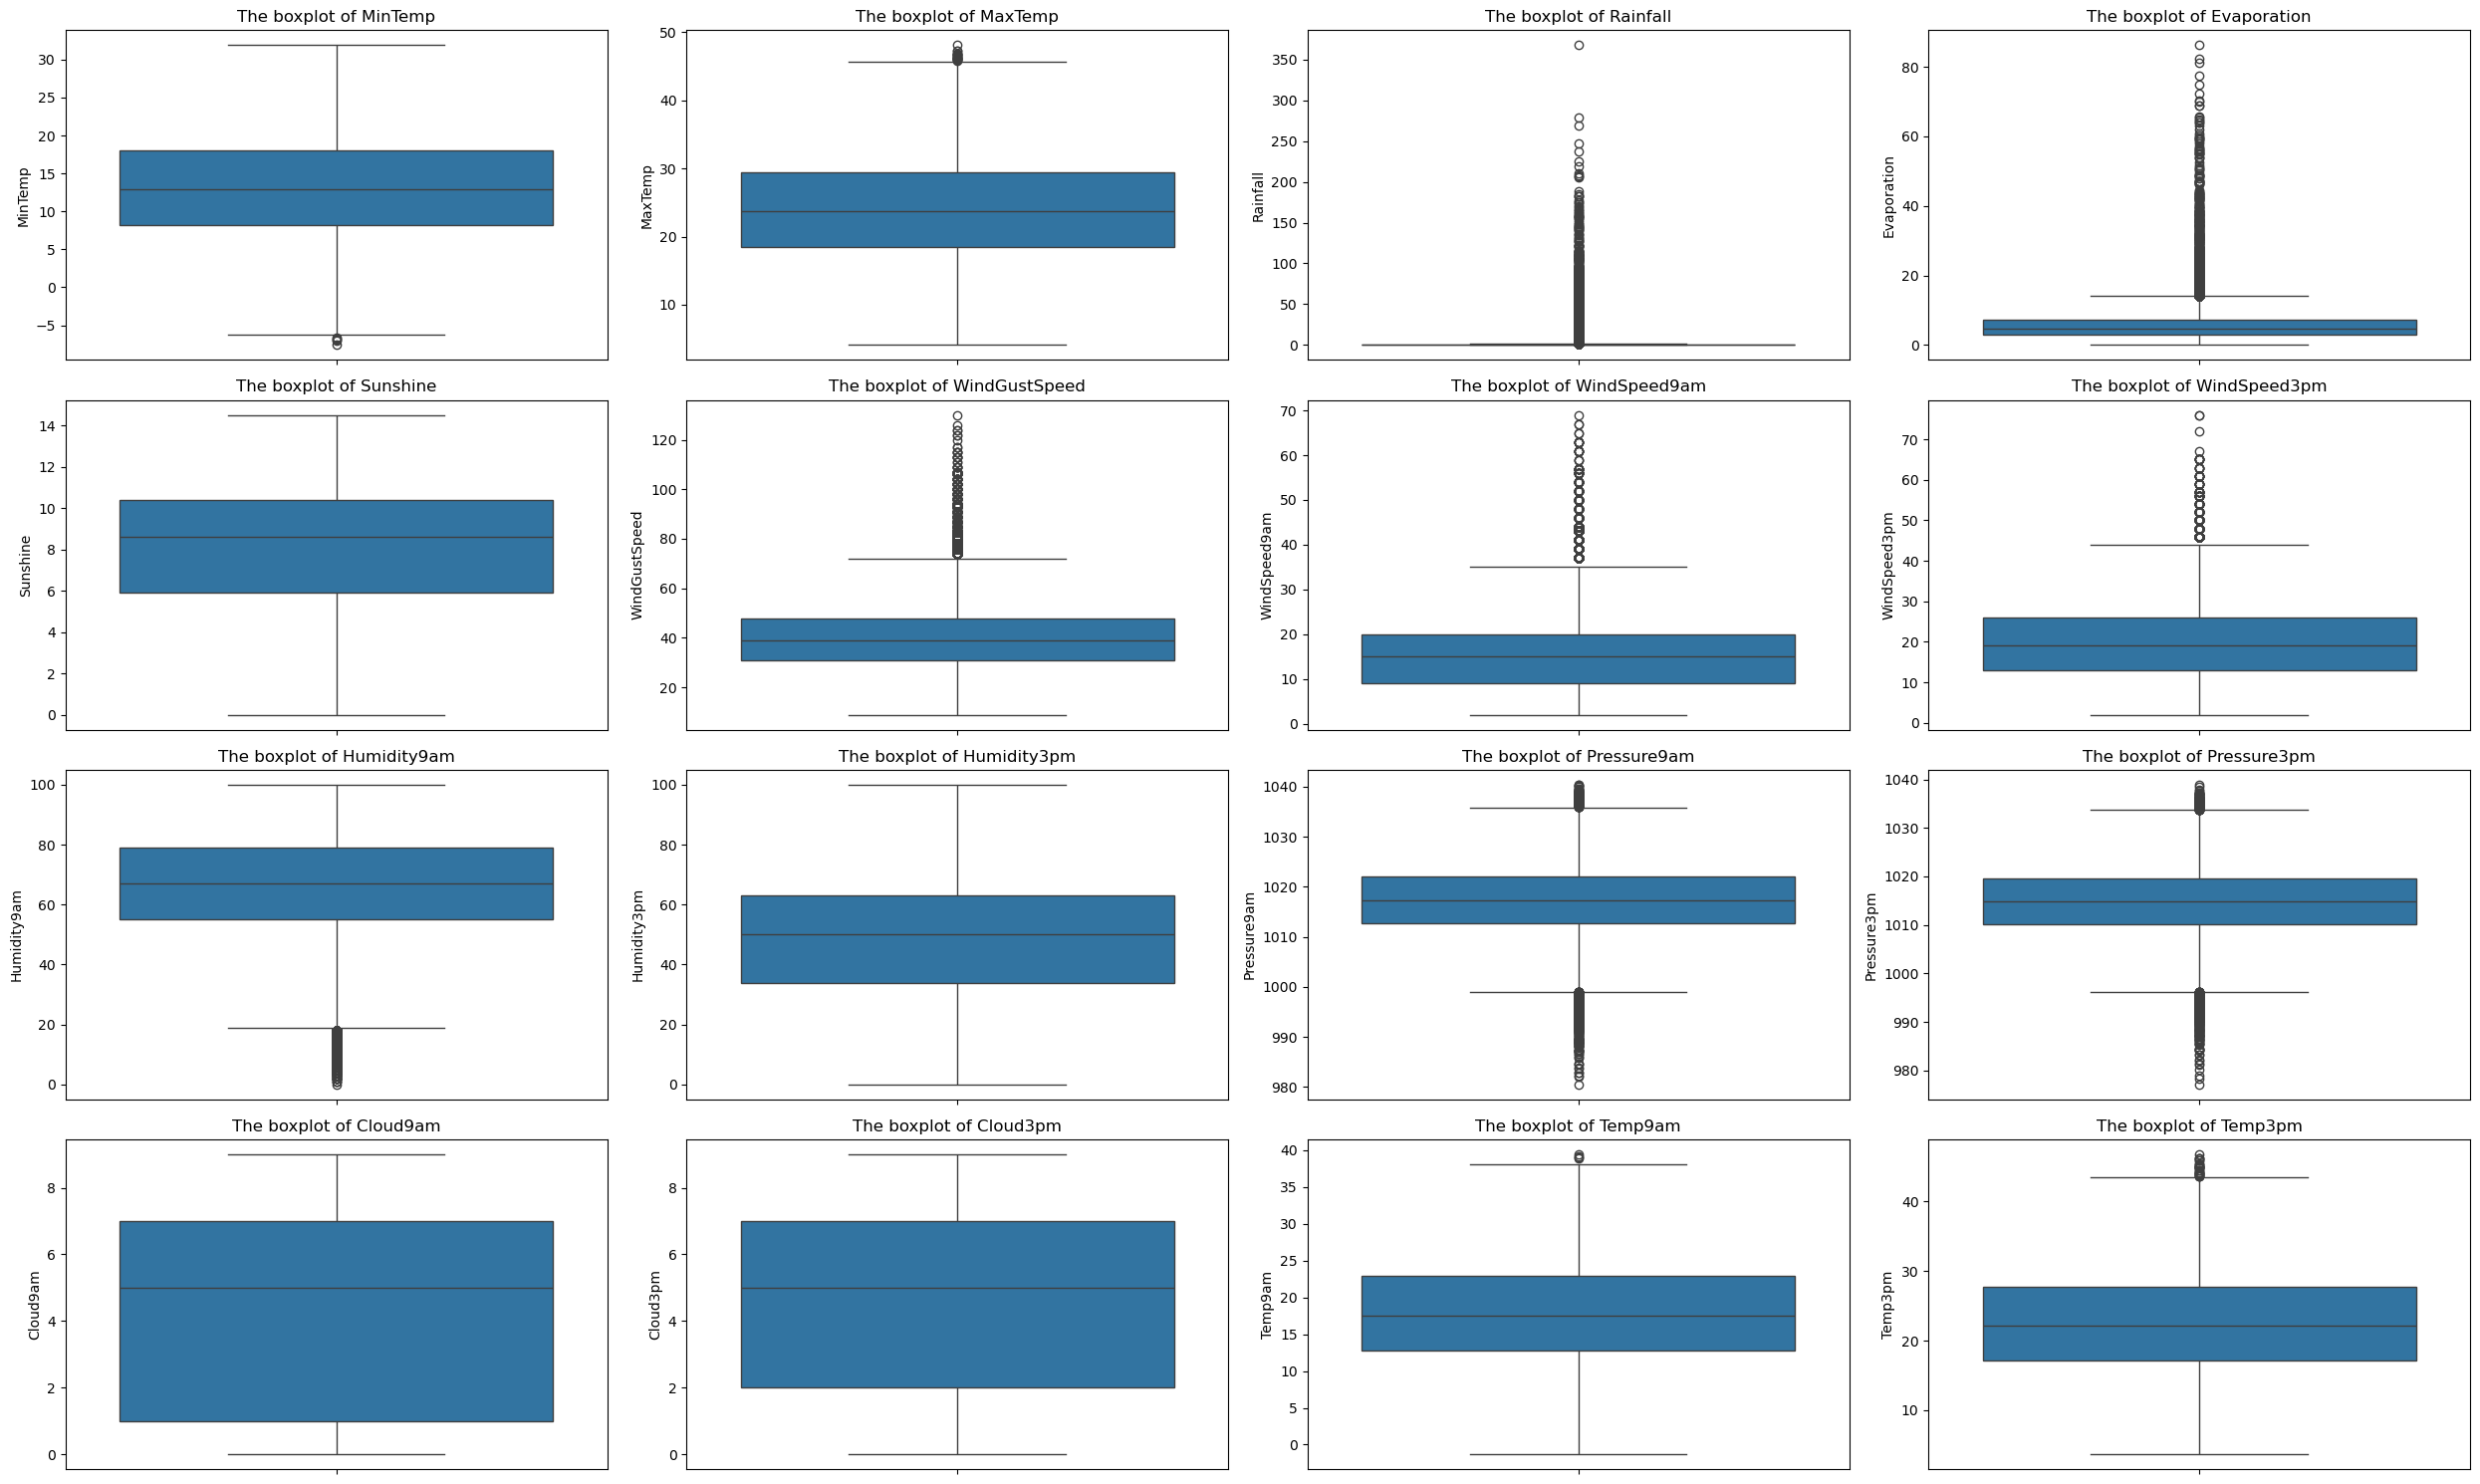

In [81]:
numeric_cols = df.select_dtypes(exclude=["object", "int32"]).columns
plt.figure(figsize=(25, 15))
for column in range(len(numeric_cols)):
    plt.subplot(4, 4, column + 1)
    sns.boxplot(y=df[numeric_cols[column]])
    plt.title(f"The boxplot of {numeric_cols[column]}")
plt.tight_layout()
plt.show()

In [82]:
col = [
    "MaxTemp",
    "Rainfall",
    "Evaporation",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Pressure3pm",
    "Pressure9am",
    "Temp9am",
    "Temp3pm",
]

for i in col:
    print(f"{i}: {df[i].dtype}")

MaxTemp: float64
Rainfall: float64
Evaporation: float64
WindGustSpeed: float64
WindSpeed9am: float64
WindSpeed3pm: float64
Humidity9am: float64
Pressure3pm: float64
Pressure9am: float64
Temp9am: float64
Temp3pm: float64


**Observation:**

- Columns like `MaxTemp , Rainfall , Evaporation , WindGustSpeed , WindSpeed9am , WindSpeed3pm , Humidity9am , Pressure3pm , Pressure9am , Temp9am , Temp3pm` have outliers.
- we will deal these outliers using IQR (Interquantile range)


In [83]:
# list of column which have outliers
col = [
    "MaxTemp",
    "Rainfall",
    "Evaporation",
    "WindGustSpeed",
    "WindSpeed9am",
    "WindSpeed3pm",
    "Humidity9am",
    "Pressure3pm",
    "Pressure9am",
    "Temp9am",
    "Temp3pm",
]

for i in col:
    # Find Q1 and Q3
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    # Find IQR
    iqr = q3 - q1
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
    median = df[i].median()

    df[i] = np.where((df[i] < lower_limit) | (df[i] > upper_limit), median, df[i])

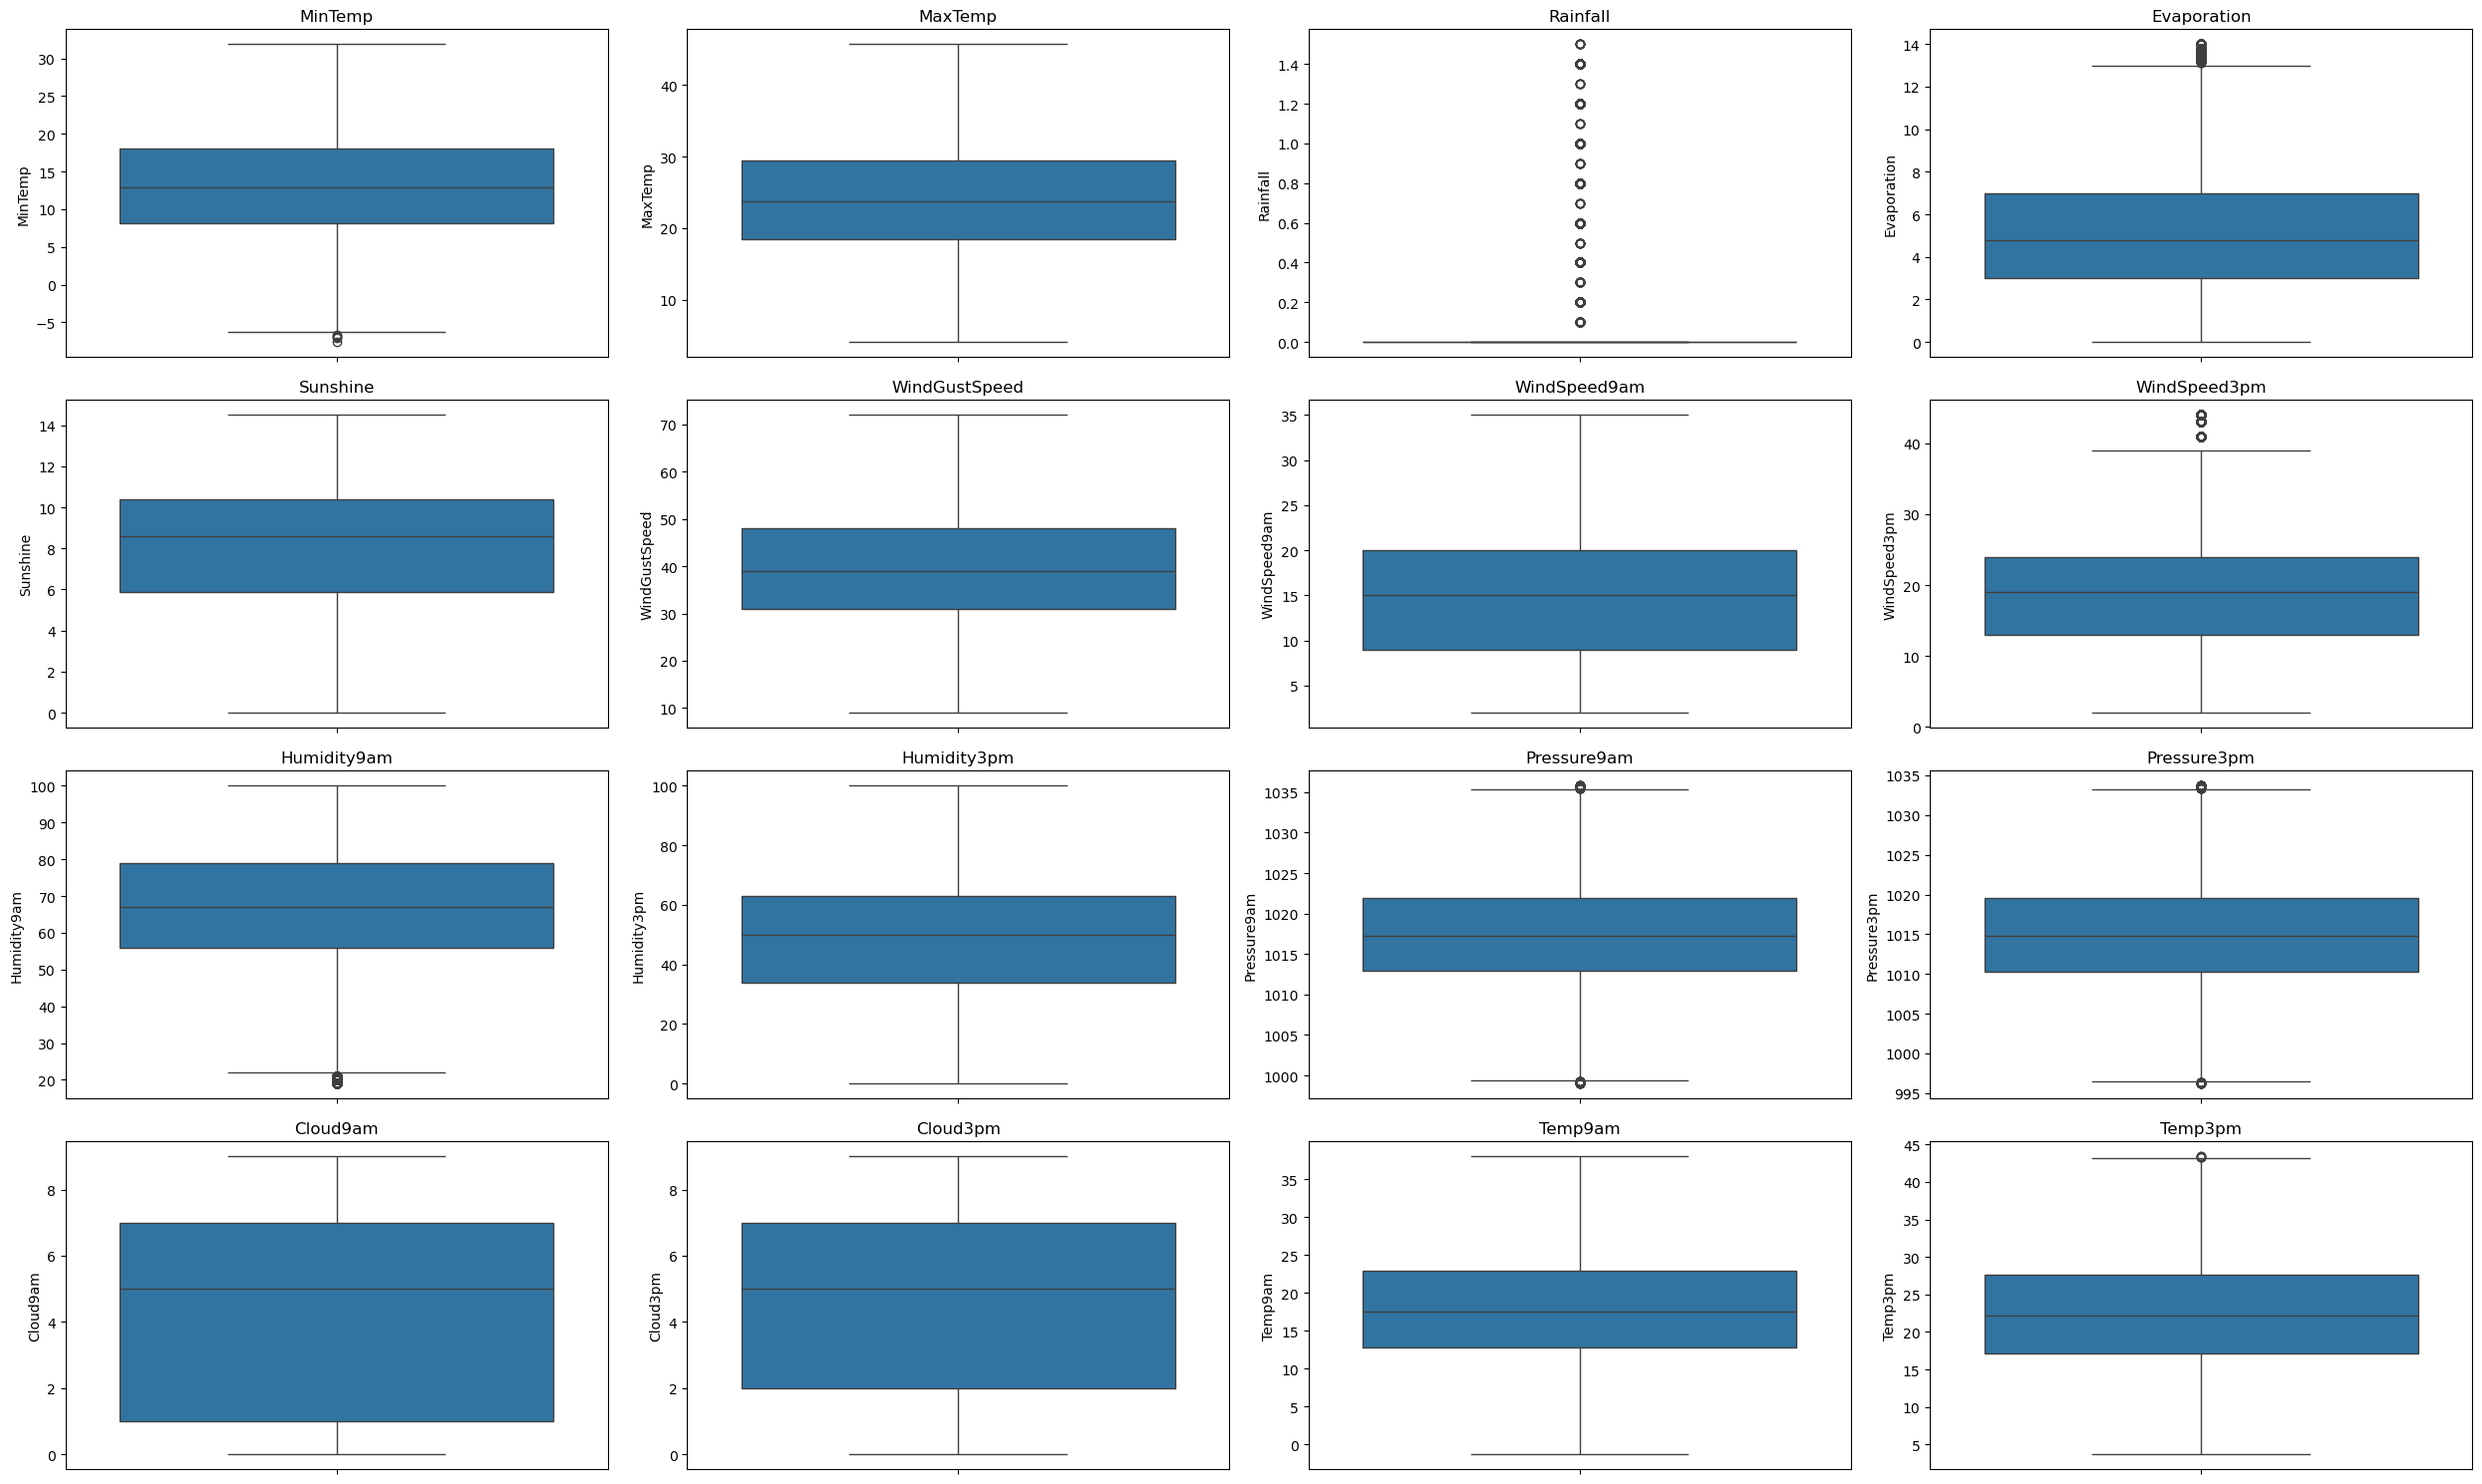

In [84]:
numeric_cols = df.select_dtypes(exclude=["object", "int32"]).columns
plt.figure(figsize=(25, 15))

for col in range(len(numeric_cols)):
    plt.subplot(4, 4, col + 1)
    sns.boxplot(y=df[numeric_cols[col]])
    plt.title(numeric_cols[col])

plt.tight_layout()
plt.show()

**Observation:**

- Some columns like `Rainfall  , Evaporation , WindSpeed3pm` have left with extreme values


## **Checking distribution numeric columns by using histogram**

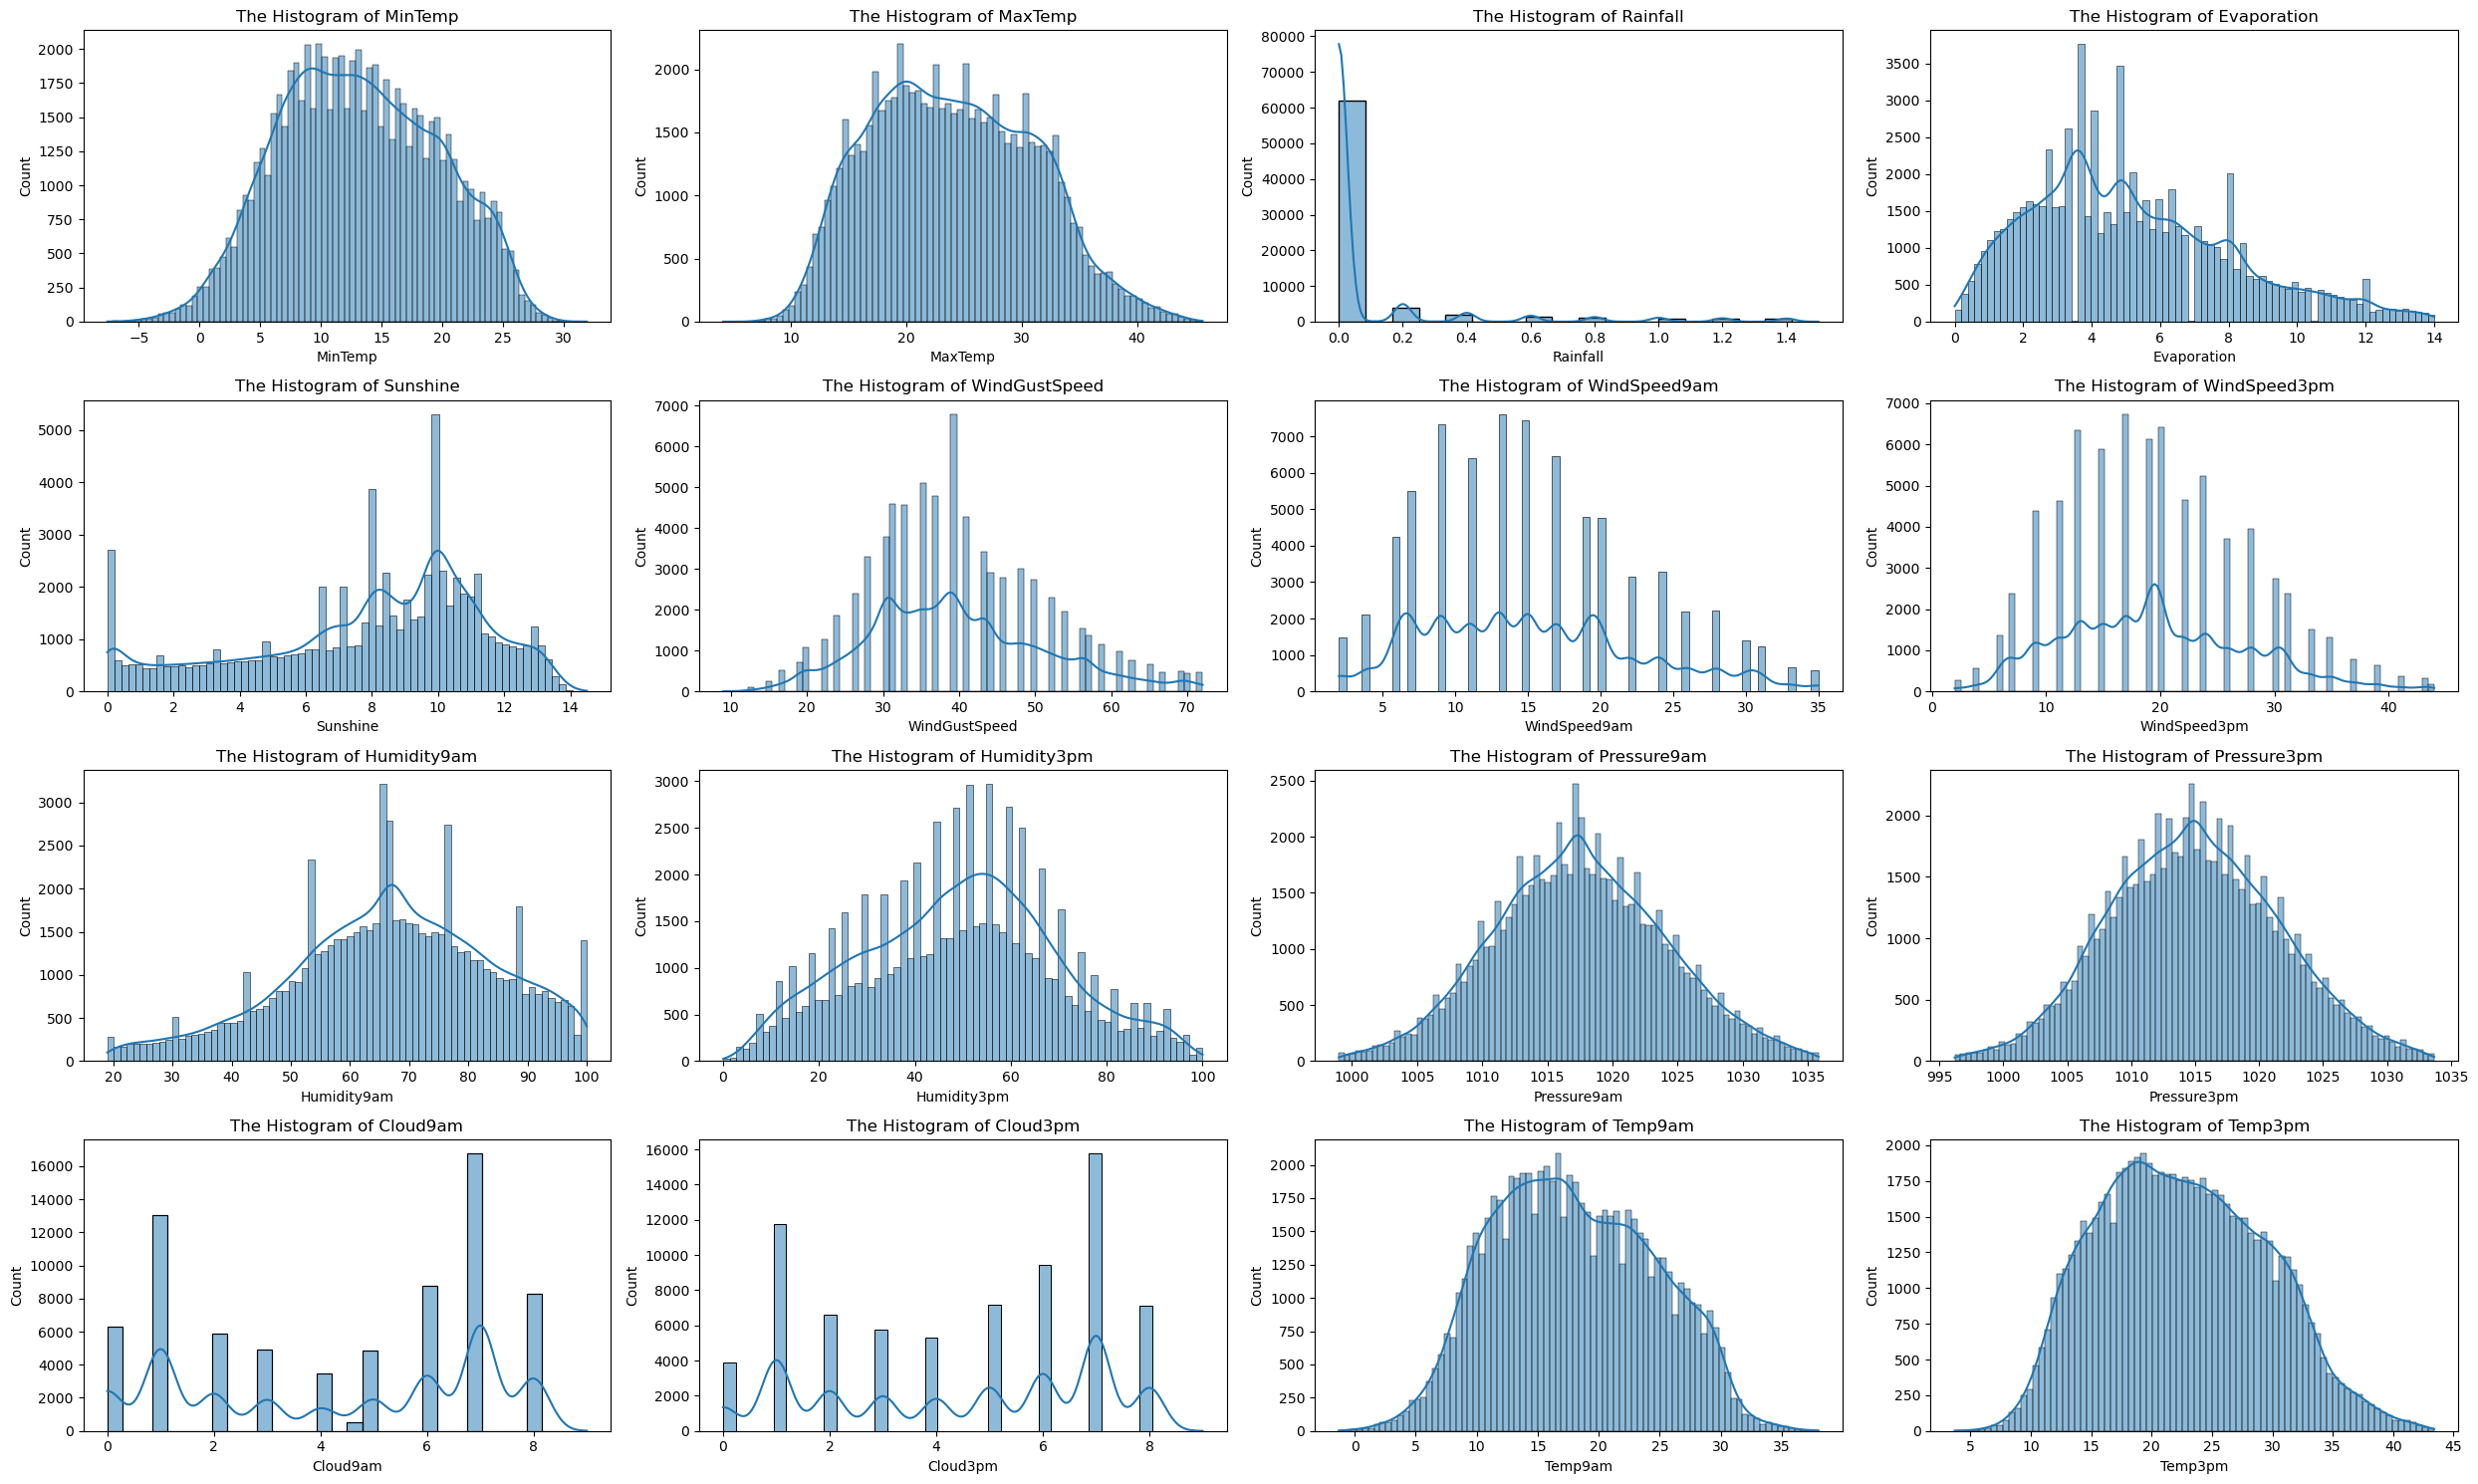

In [85]:
# Select numeric columns 
numeric_cols = df.select_dtypes(exclude=["object", "int32"]).columns

# Create subplots
plt.figure(figsize=(25, 15))  # Adjust the figure size as needed

# defining the for loop to print subplots
for column in range(len(numeric_cols)):
    plt.subplot(4, 4, column + 1)
    # plotting histogram
    sns.histplot(x=df[numeric_cols[column]], kde=True)
    plt.title(f"The Histogram of {numeric_cols[column]}")

# adjusting the spacing between subplots
plt.tight_layout()
plt.show()

In [86]:
sc_col = df.select_dtypes(include="float64").columns
sc_col = sc_col.drop(["Rainfall", "Cloud9am", "Cloud3pm"])

sc = StandardScaler()

# defining the for loop for standard scaling
for col in sc_col:
    df[col] = sc.fit_transform(df[[col]])

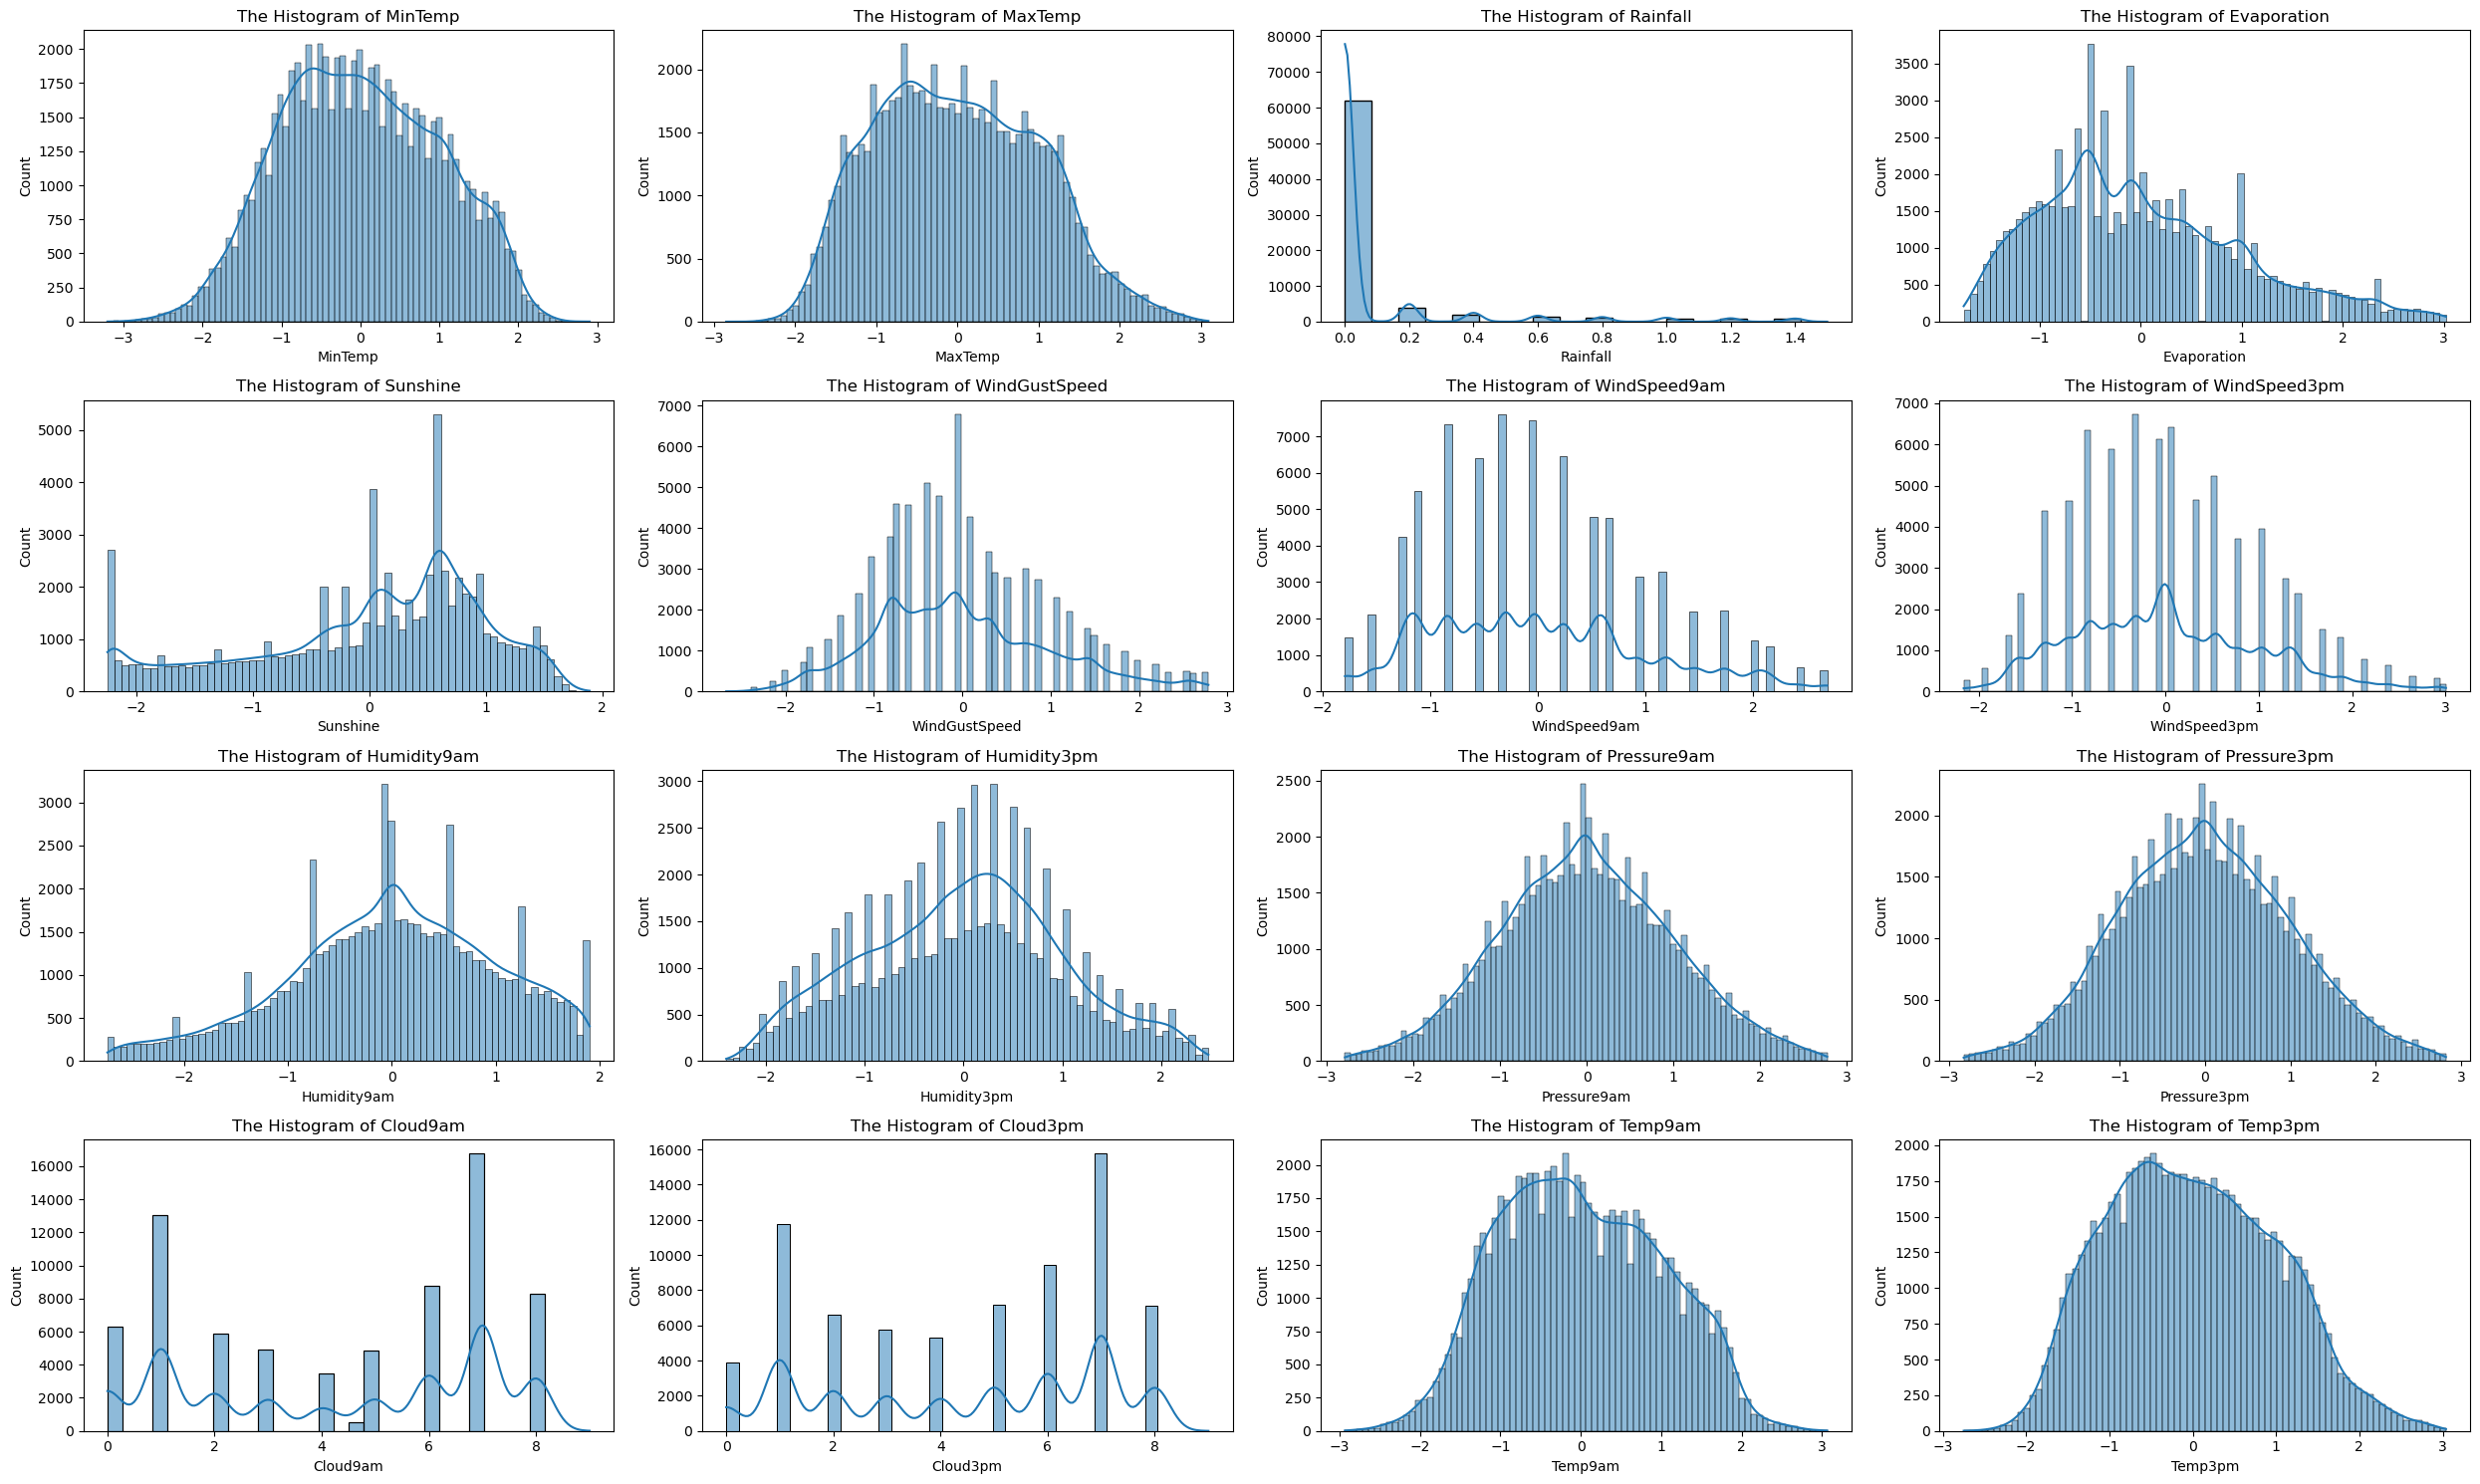

In [87]:
cols = df.select_dtypes(include="float64").columns

plt.figure(figsize=(25, 15))

for col in range(len(cols)):
    plt.subplot(4, 4, col + 1)
    sns.histplot(x=df[cols[col]], kde=True)
    plt.title(f"The Histogram of {cols[col]}")

plt.tight_layout()
plt.show()

In [88]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,Cobar,0.738580,1.590475,0.0,2.339189,1.262481,SSW,0.706283,ENE,SW,-1.250239,0.053330,-2.677277,-1.767654,-1.686080,-1.593858,2.0,5.0,1.324370,1.581283,No,No,1,1,2009
1,Cobar,0.815926,0.691191,0.0,-0.113685,1.462195,S,-0.245892,SSE,SSE,0.515137,-0.069639,-2.105026,-2.011625,-0.688539,-0.433169,1.0,1.0,0.363147,0.648265,No,No,2,1,2009
2,Cobar,0.970618,1.933059,0.0,1.930376,0.777460,NNE,0.533160,NNE,NNW,2.008916,-0.561512,-1.418325,-1.328506,-0.779225,-0.870311,1.0,6.0,1.644778,1.799959,No,No,4,1,2009
3,Cobar,1.357348,2.047254,0.0,2.134782,1.233950,WNW,-0.765260,WNW,WSW,-1.250239,-1.668227,-1.704451,-1.328506,-0.718768,-0.885385,1.0,5.0,1.705808,1.902008,No,No,5,1,2009
4,Cobar,1.713140,2.418387,0.0,2.066647,0.149787,WNW,-0.419014,NW,WNW,0.243541,-0.807449,-2.734502,-1.670065,-1.021053,-1.141641,1.0,6.0,2.392397,2.193576,No,No,6,1,2009


In [89]:
object_col = df.select_dtypes(include="object").columns
le = LabelEncoder()
for col in object_col:
    df[col] = le.fit_transform(df[col])

In [90]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,4,0.738580,1.590475,0.0,2.339189,1.262481,11,0.706283,1,12,-1.250239,0.053330,-2.677277,-1.767654,-1.686080,-1.593858,2.0,5.0,1.324370,1.581283,0,0,1,1,2009
1,4,0.815926,0.691191,0.0,-0.113685,1.462195,8,-0.245892,10,10,0.515137,-0.069639,-2.105026,-2.011625,-0.688539,-0.433169,1.0,1.0,0.363147,0.648265,0,0,2,1,2009
2,4,0.970618,1.933059,0.0,1.930376,0.777460,5,0.533160,5,6,2.008916,-0.561512,-1.418325,-1.328506,-0.779225,-0.870311,1.0,6.0,1.644778,1.799959,0,0,4,1,2009
3,4,1.357348,2.047254,0.0,2.134782,1.233950,14,-0.765260,14,15,-1.250239,-1.668227,-1.704451,-1.328506,-0.718768,-0.885385,1.0,5.0,1.705808,1.902008,0,0,5,1,2009
4,4,1.713140,2.418387,0.0,2.066647,0.149787,14,-0.419014,7,14,0.243541,-0.807449,-2.734502,-1.670065,-1.021053,-1.141641,1.0,6.0,2.392397,2.193576,0,0,6,1,2009


In [91]:
df.select_dtypes(include="float64").corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.747428,-0.028466,0.502211,0.068989,0.162461,0.142306,0.142237,-0.171101,0.056903,-0.494136,-0.505096,0.077343,0.021482,0.904884,0.724463
MaxTemp,0.747428,1.000000,-0.145347,0.628416,0.432810,0.078328,0.014058,0.017592,-0.451842,-0.455919,-0.373121,-0.461986,-0.269778,-0.258888,0.890480,0.984148
Rainfall,-0.028466,-0.145347,1.000000,-0.129446,-0.128354,0.016053,0.015902,0.031847,0.146244,0.152682,0.004641,0.036427,0.123679,0.112726,-0.091295,-0.148338
Evaporation,0.502211,0.628416,-0.129446,1.000000,0.372133,0.189318,0.161161,0.120132,-0.494693,-0.386829,-0.285367,-0.316479,-0.215346,-0.222712,0.588859,0.611349
Sunshine,0.068989,0.432810,-0.128354,0.372133,1.000000,-0.030182,0.009935,0.023598,-0.463031,-0.591986,0.037649,-0.020626,-0.615989,-0.627766,0.267044,0.453494
WindGustSpeed,0.162461,0.078328,0.016053,0.189318,-0.030182,1.000000,0.523185,0.639585,-0.184740,-0.046319,-0.378371,-0.335624,0.072952,0.101891,0.130395,0.045126
WindSpeed9am,0.142306,0.014058,0.015902,0.161161,0.009935,0.523185,1.000000,0.421474,-0.215874,-0.054919,-0.169492,-0.130421,0.011775,0.035049,0.082457,0.004403
WindSpeed3pm,0.142237,0.017592,0.031847,0.120132,0.023598,0.639585,0.421474,1.000000,-0.091871,0.043984,-0.270087,-0.231557,0.071149,0.036305,0.122629,-0.003326
Humidity9am,-0.171101,-0.451842,0.146244,-0.494693,-0.463031,-0.184740,-0.215874,-0.091871,1.000000,0.646192,0.107796,0.155931,0.431514,0.341095,-0.388181,-0.443842
Humidity3pm,0.056903,-0.455919,0.152682,-0.386829,-0.591986,-0.046319,-0.054919,0.043984,0.646192,1.000000,-0.050329,0.031548,0.507036,0.499948,-0.161558,-0.503017


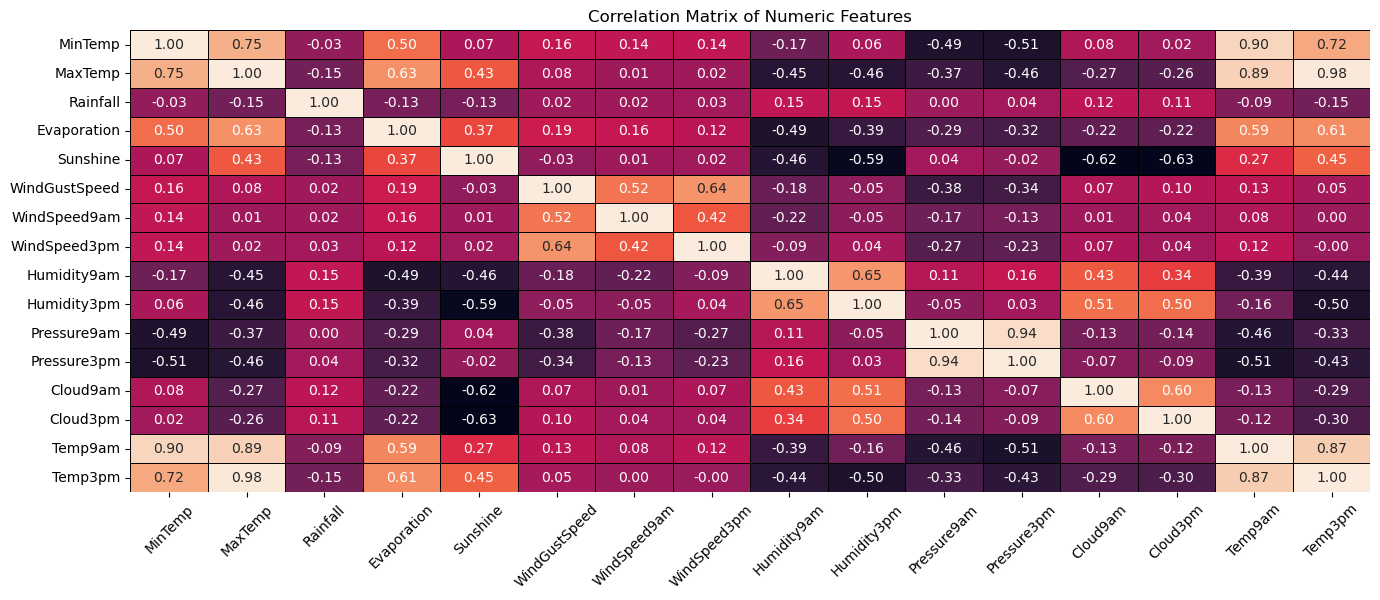

In [92]:
# calculating the correlation matrix
corr_matrix = df.select_dtypes(include="float64").corr()

# defining the figure size
plt.figure(figsize=(16, 6))

sns.heatmap(
    corr_matrix,
    cbar=False,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor="black",
)

plt.xticks(rotation=45)

plt.title("Correlation Matrix of Numeric Features")
plt.show()

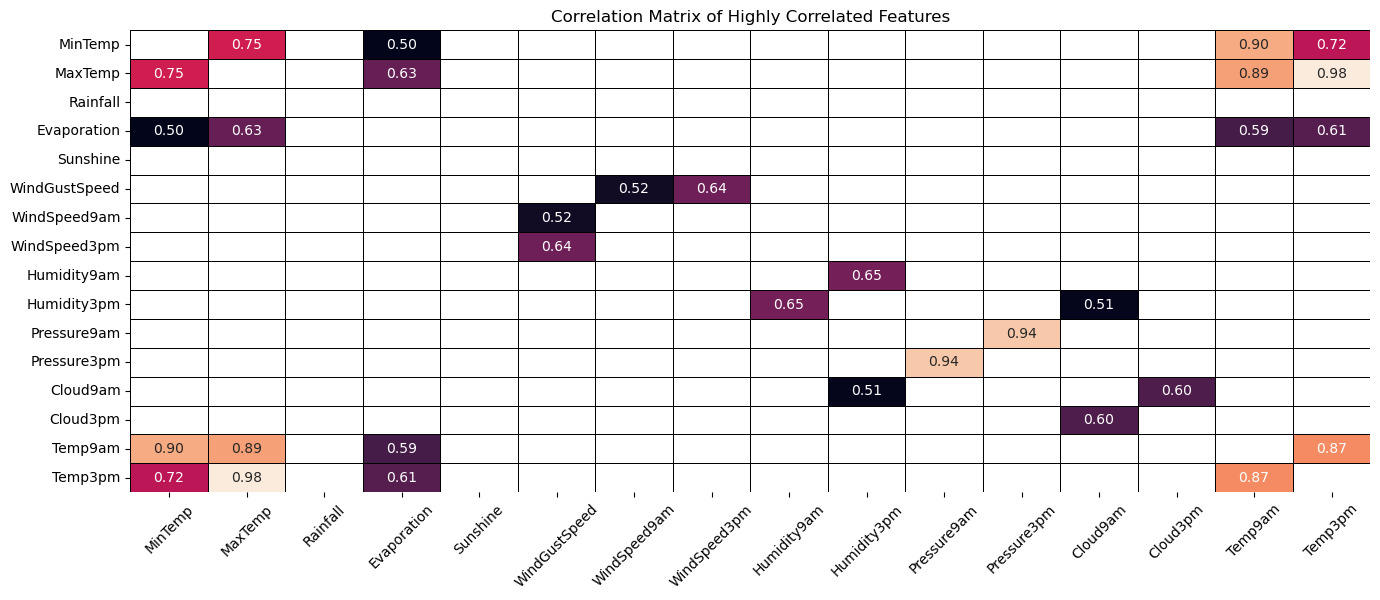

In [93]:
# correlation matrix of highly correlated features
plt.figure(figsize=(16, 6))
corr = df.select_dtypes(include="float64").corr()
# plotting the heatmap of correlation matrix which have a correlation greater than 0.5 and less than 0.99
sns.heatmap(
    corr[(corr > 0.5) & (corr < 0.99)],
    cbar=False,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor="black",
)
# rotating the x axis labels
plt.xticks(rotation=45)
plt.title("Correlation Matrix of Highly Correlated Features")
plt.show()

In [94]:
# selecting the specific columns
col = df.select_dtypes(include="float64").columns

# calculating the variance inflation factor
vif = [variance_inflation_factor(df[col].values, i) for i in range(len(col))]

# creating a dataframe of vif to properly display the results
col = col
vif = pd.DataFrame({"column": col, "vif": vif})
vif.round(2)

,column,vif
0,MinTemp,9.32
1,MaxTemp,42.30
2,Rainfall,1.15
3,Evaporation,1.96
4,Sunshine,1.87
5,WindGustSpeed,2.24
6,WindSpeed9am,1.55
7,WindSpeed3pm,1.85
8,Humidity9am,2.93
9,Humidity3pm,5.27


In [95]:
df["RainTomorrow"].value_counts()

RainTomorrow
0    57161
1    15705
Name: count, dtype: int64

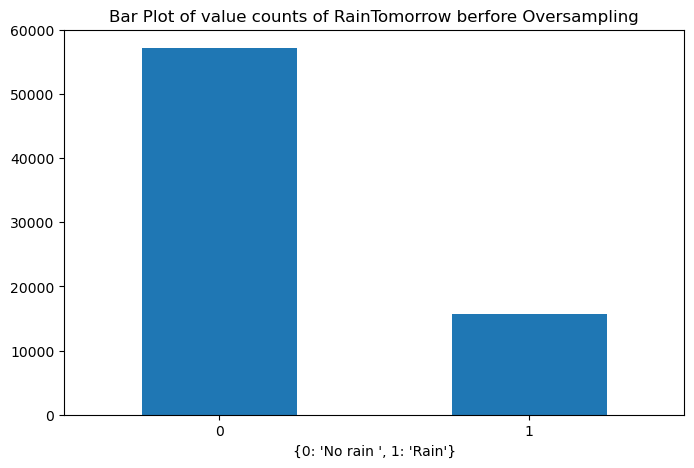

In [96]:
df["RainTomorrow"].value_counts().plot(kind="bar")
plt.title("Bar Plot of value counts of RainTomorrow berfore Oversampling")
plt.xticks(rotation=360)
plt.xlabel({0: "No rain ", 1: "Rain"})
plt.show()

In [97]:
X_resample = df.drop("RainTomorrow", axis=1)

y_resample = df["RainTomorrow"]

X_train_resample, X_test_resample, y_train_resample, y_test_resample = train_test_split(
    X_resample, y_resample, test_size=0.2, random_state=42
)
smote = SMOTE(random_state=42)

# applying SMOTE on training data
X_train_resample, y_train_resample = smote.fit_resample(
    X_train_resample, y_train_resample
)

  File "c:\Users\eiadn\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


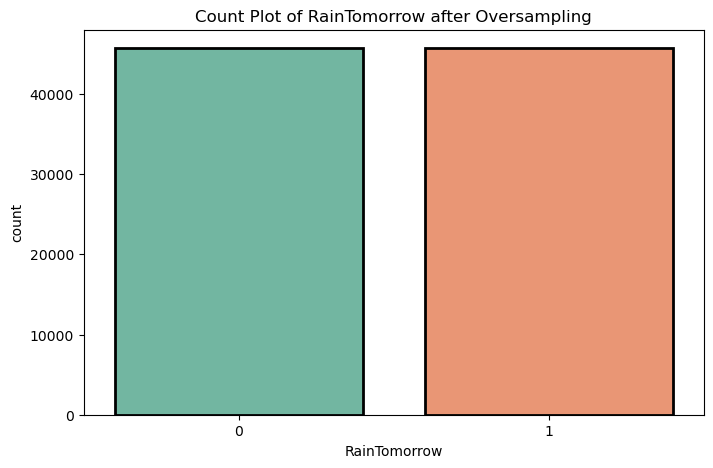

In [98]:
sns.countplot(x=y_train_resample, palette="Set2", edgecolor="black", linewidth=2)
plt.title("Count Plot of RainTomorrow after Oversampling")
plt.show()

In [99]:
X1 = X_train_resample.drop(["Temp9am", "Temp3pm", "Pressure3pm"], axis=1)
X2 = X_test_resample.drop(["Temp9am", "Temp3pm", "Pressure3pm"], axis=1)

X = pd.concat([X1, X2], axis=0)

y1 = y_train_resample
y2 = y_test_resample

y = pd.concat([y1, y2], axis=0)

In [100]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [101]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix
--------------------------------------------------


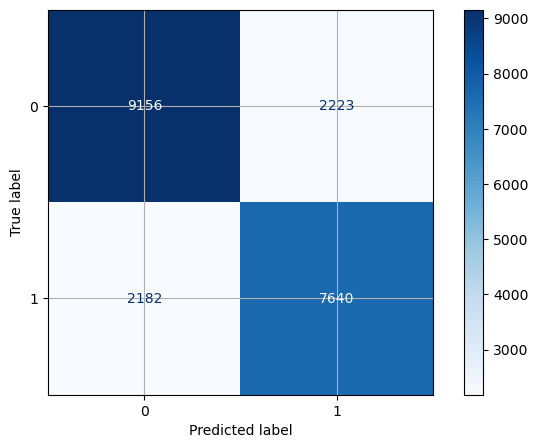



Classification Report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     11379
           1       0.77      0.78      0.78      9822

    accuracy                           0.79     21201
   macro avg       0.79      0.79      0.79     21201
weighted avg       0.79      0.79      0.79     21201



ROC Curve
--------------------------------------------------


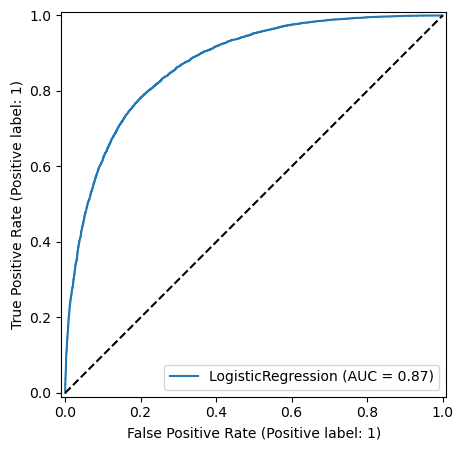



Checking model fitness
--------------------------------------------------
Train score: 0.7859
Test score:  0.7922




In [102]:
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, classification_report

def conf_matrix(model, X_test, y_test, cmap='Blues'):
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap)
    plt.grid()
    plt.show()

def roc_curve_custom(model, X_test, y_test):
    RocCurveDisplay.from_estimator(model, X_test, y_test)
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    plt.show()
    
def evaluate(model, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, y_pred=y_pred):
    # Confusion Matrix
    print('Confusion Matrix')
    print('-'*50)
    conf_matrix(model, X_test, y_test)
    print('\n') 
    
    # Classification Report
    print('Classification Report') 
    print('-'*50)
    print(classification_report(y_test, y_pred))
    print('\n')
    
    # ROC Curve
    print('ROC Curve')
    print('-'*50)
    roc_curve_custom(model, X_test, y_test)
    print('\n')
    
    # Checking model fitness
    print('Checking model fitness') 
    print('-'*50)
    print('Train score:', round(model.score(X_train, y_train), 4))
    print('Test score: ', round(model.score(X_test, y_test), 4))
    print('\n')
    
evaluate(logreg)

In [103]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
y_pred_tree

array([1, 0, 1, ..., 0, 0, 0])

Confusion Matrix
--------------------------------------------------


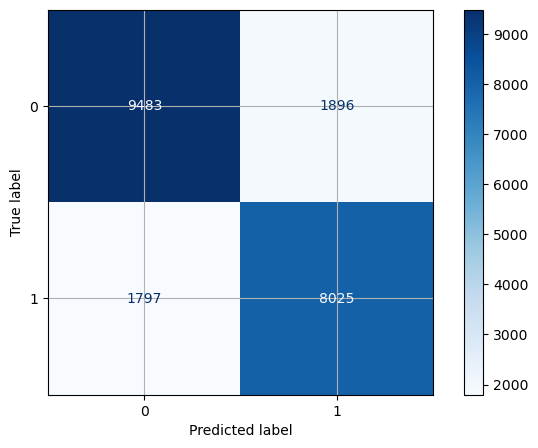



Classification Report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.83      0.84     11379
           1       0.81      0.82      0.81      9822

    accuracy                           0.83     21201
   macro avg       0.82      0.83      0.82     21201
weighted avg       0.83      0.83      0.83     21201



ROC Curve
--------------------------------------------------


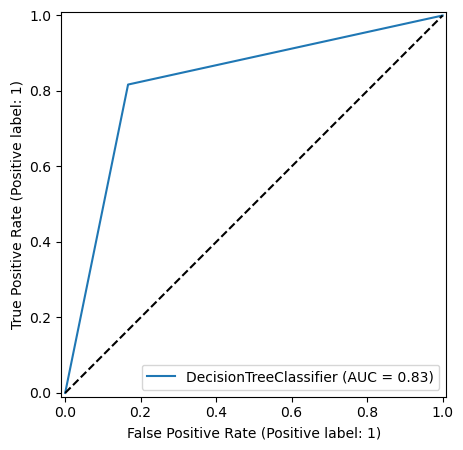



Checking model fitness
--------------------------------------------------
Train score: 1.0
Test score:  0.8258




In [104]:
evaluate(clf, y_pred=y_pred_tree)

In [105]:
from sklearn.model_selection import GridSearchCV, cross_val_score

params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}

# clf = RandomForestClassifier(random_state=42)

clf_gs = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=3)
clf_gs.fit(X_train, y_train)

train_score = clf_gs.score(X_train, y_train)
test_score = clf_gs.score(X_test, y_test)


In [106]:
cross_val_scores = cross_val_score(clf_gs.best_estimator_, X_train, y_train, cv=3)
mean_cross_val_score = round(cross_val_scores.mean(), 4)

print("Train score:", round(train_score, 4))
print("Test score:", round(test_score, 4))
print("Cross-Validation Mean Score:", mean_cross_val_score)
print("Best parameters:", clf_gs.best_params_)

Train score: 0.854
Test score: 0.826
Cross-Validation Mean Score: 0.8185
Best parameters: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


In [107]:
import os
import pickle

os.makedirs('saved_models', exist_ok=True)
with open('saved_models/clf_gs.pkl', 'wb') as f:
    pickle.dump(clf_gs, f)


In [108]:

with open('saved_models/clf_gs.pkl', 'rb') as f:
    clf_gs = pickle.load(f)


In [109]:
clf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [110]:
round(clf_gs.best_score_, 4)

0.8185

In [111]:
y_pred_tree_gs = clf_gs.best_estimator_.predict(X_test)
y_pred_tree_gs

array([1, 0, 1, ..., 0, 0, 0])

Confusion Matrix
--------------------------------------------------


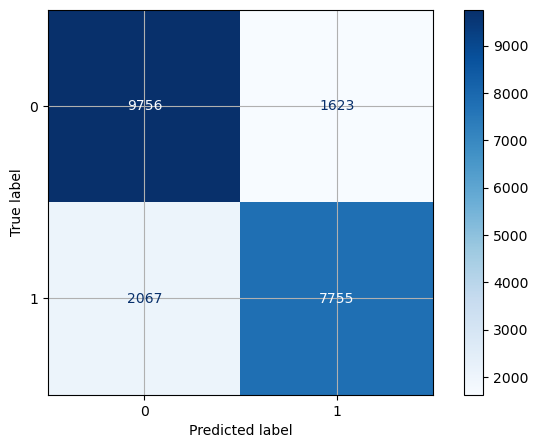



Classification Report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.86      0.84     11379
           1       0.83      0.79      0.81      9822

    accuracy                           0.83     21201
   macro avg       0.83      0.82      0.82     21201
weighted avg       0.83      0.83      0.83     21201



ROC Curve
--------------------------------------------------


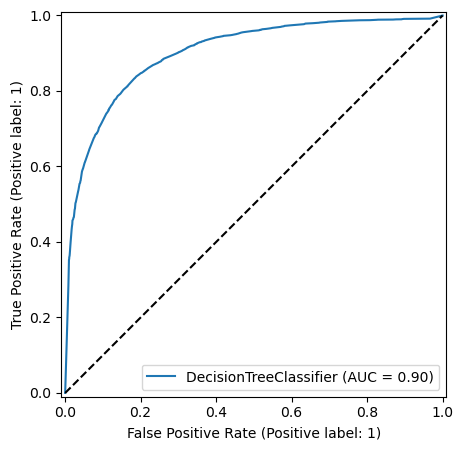



Checking model fitness
--------------------------------------------------
Train score: 0.854
Test score:  0.826




In [112]:
evaluate(clf_gs.best_estimator_, y_pred=y_pred_tree_gs)

## **Random Forest**

In [113]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 0, 1, ..., 0, 0, 0])

Confusion Matrix
--------------------------------------------------


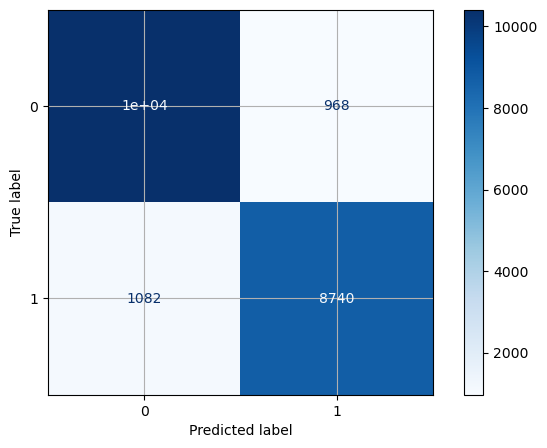



Classification Report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     11379
           1       0.90      0.89      0.90      9822

    accuracy                           0.90     21201
   macro avg       0.90      0.90      0.90     21201
weighted avg       0.90      0.90      0.90     21201



ROC Curve
--------------------------------------------------


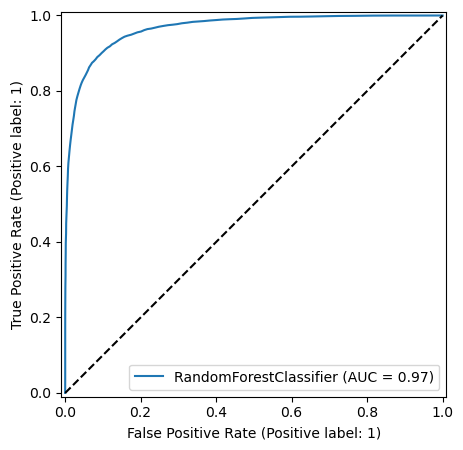



Checking model fitness
--------------------------------------------------
Train score: 1.0
Test score:  0.9033




In [114]:
evaluate(rf, y_pred=y_pred_rf)

In [115]:
from sklearn.model_selection import RandomizedSearchCV


rf_params = {
    'n_estimators': [10, 35, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'random_state': [42]
}
rf_rs = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_params,
    n_iter=10,  
    scoring='accuracy',
    cv=3,
    n_jobs=-1,  
    random_state=42
)

In [116]:
rf_rs.fit(X_train, y_train)
train_score = rf_rs.score(X_train, y_train)
test_score = rf_rs.score(X_test, y_test)

cross_val_scores = cross_val_score(rf_rs.best_estimator_, X_train, y_train, cv=3, n_jobs=-1)
mean_cross_val_score = round(cross_val_scores.mean(), 4)


In [117]:
print("Train score:", round(train_score, 4))
print("Test score:", round(test_score, 4))
print("Cross-Validation Mean Score:", mean_cross_val_score)
print("Best parameters:", rf_rs.best_params_)

Train score: 0.8773
Test score: 0.8608
Cross-Validation Mean Score: 0.8544
Best parameters: {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 11, 'criterion': 'entropy'}


In [118]:
import pickle

with open('saved_models/rf_rs.pkl', 'wb') as f:
    pickle.dump(rf_rs, f)


In [119]:
with open('saved_models/rf_rs.pkl', 'rb') as f:
    rf_rs = pickle.load(f)


In [120]:
print(rf_rs.best_params_)


{'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 11, 'criterion': 'entropy'}


In [121]:
round(rf_rs.best_score_, 4)

0.8544

In [122]:
y_pred_rf_gs = rf_rs.predict(X_test)
y_pred_rf_gs

array([1, 0, 1, ..., 0, 0, 0])

Confusion Matrix
--------------------------------------------------


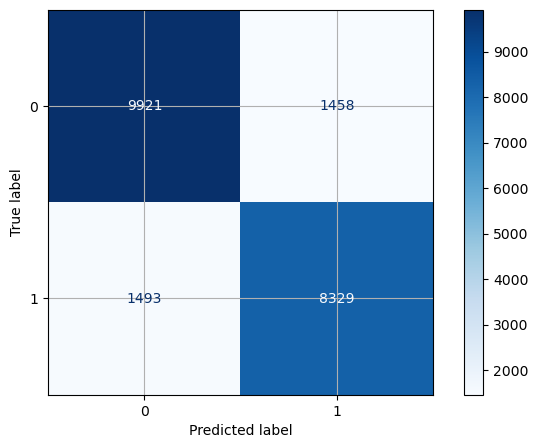



Classification Report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     11379
           1       0.85      0.85      0.85      9822

    accuracy                           0.86     21201
   macro avg       0.86      0.86      0.86     21201
weighted avg       0.86      0.86      0.86     21201



ROC Curve
--------------------------------------------------


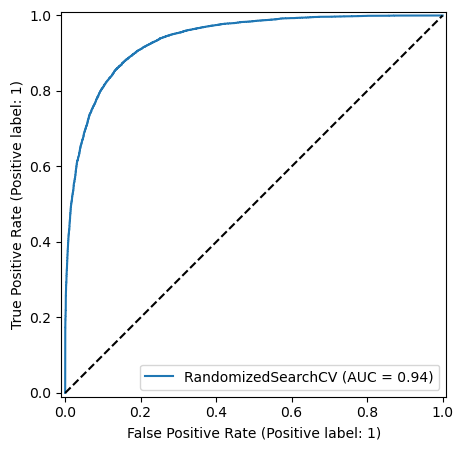



Checking model fitness
--------------------------------------------------
Train score: 0.8773
Test score:  0.8608




In [123]:
evaluate(rf_rs, y_pred=y_pred_rf_gs)

## **XGBoost**

In [124]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb

array([1, 0, 1, ..., 0, 0, 0])

Confusion Matrix
--------------------------------------------------


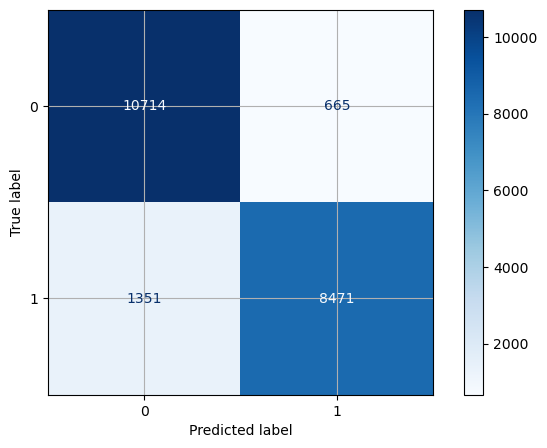



Classification Report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     11379
           1       0.93      0.86      0.89      9822

    accuracy                           0.90     21201
   macro avg       0.91      0.90      0.90     21201
weighted avg       0.91      0.90      0.90     21201



ROC Curve
--------------------------------------------------


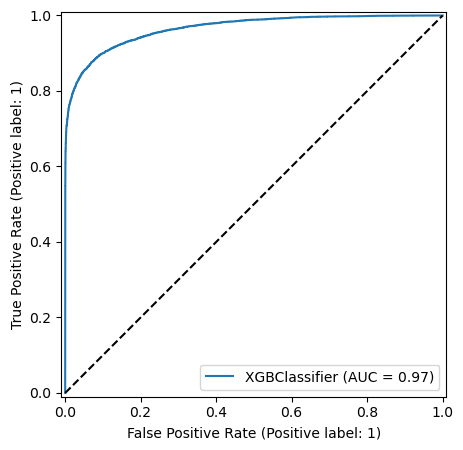



Checking model fitness
--------------------------------------------------
Train score: 0.9307
Test score:  0.9049




In [125]:
evaluate(xgb, y_pred=y_pred_xgb)

In [126]:
# from xgboost import XGBClassifier
# from sklearn.model_selection import RandomizedSearchCV

# xgb_params = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 10],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'reg_alpha': [0, 0.1, 0.5],
#     'reg_lambda': [1, 1.5, 2]
# }

# xgb = XGBClassifier(random_state=42)

# xgb_rs = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_params, 
#                             scoring='accuracy', cv=5, n_iter=20, random_state=42)

# xgb_rs.fit(X_train, y_train)

# print("Best parameters after tuning:", xgb_rs.best_params_)

# train_score = xgb_rs.score(X_train, y_train)
# test_score = xgb_rs.score(X_test, y_test)

# print("Train score after tuning:", round(train_score, 4))
# print("Test score after tuning:", round(test_score, 4))


In [127]:
# cv_scores = cross_val_score(xgb_rs.best_estimator_, X_train, y_train, cv=5, scoring='accuracy')
# print("Cross-validation scores:", cv_scores)
# print("Mean cross-validation score:", round(cv_scores.mean(), 4ش))

In [128]:
with open('saved_models/xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)

In [129]:
with open('saved_models/xgb_model.pkl', 'rb') as file:
    xgb_loaded = pickle.load(file)

In [130]:
y_pred_xgb_loaded = xgb_loaded.predict(X_test)
y_pred_xgb_loaded

array([1, 0, 1, ..., 0, 0, 0])

Confusion Matrix
--------------------------------------------------


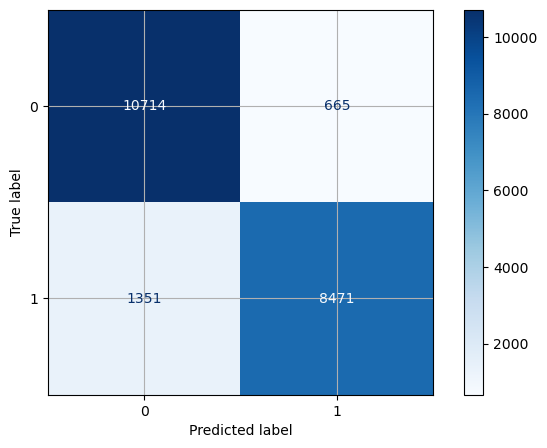



Classification Report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     11379
           1       0.93      0.86      0.89      9822

    accuracy                           0.90     21201
   macro avg       0.91      0.90      0.90     21201
weighted avg       0.91      0.90      0.90     21201



ROC Curve
--------------------------------------------------


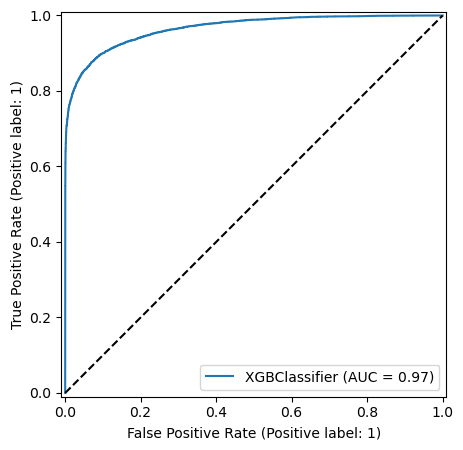



Checking model fitness
--------------------------------------------------
Train score: 0.9307
Test score:  0.9049




In [131]:
evaluate(xgb_loaded, y_pred=y_pred_xgb_loaded)

In [132]:
result = []
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
    "Desicion Tree": DecisionTreeClassifier(random_state=42),
}

for name, model in models.items():

    start_fit = time.time()
    model.fit(X_train, y_train)
    end_fit = time.time()
    fit_time = end_fit - start_fit
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    result.append((name, acc, precision, recall, fit_time))

result = pd.DataFrame(
    result, columns=["Model", "Accuracy Score", "Precision", "Recall", "Fit Time (s)"]
)

result

,Model,Accuracy Score,Precision,Recall,Fit Time (s)
0,Logistic Regression,0.792227,0.774612,0.777846,0.763073
1,Random Forest,0.903306,0.900288,0.889839,29.908118
2,XGBoost,0.904910,0.927211,0.862452,0.380257
3,Desicion Tree,0.825810,0.808890,0.817043,2.101360


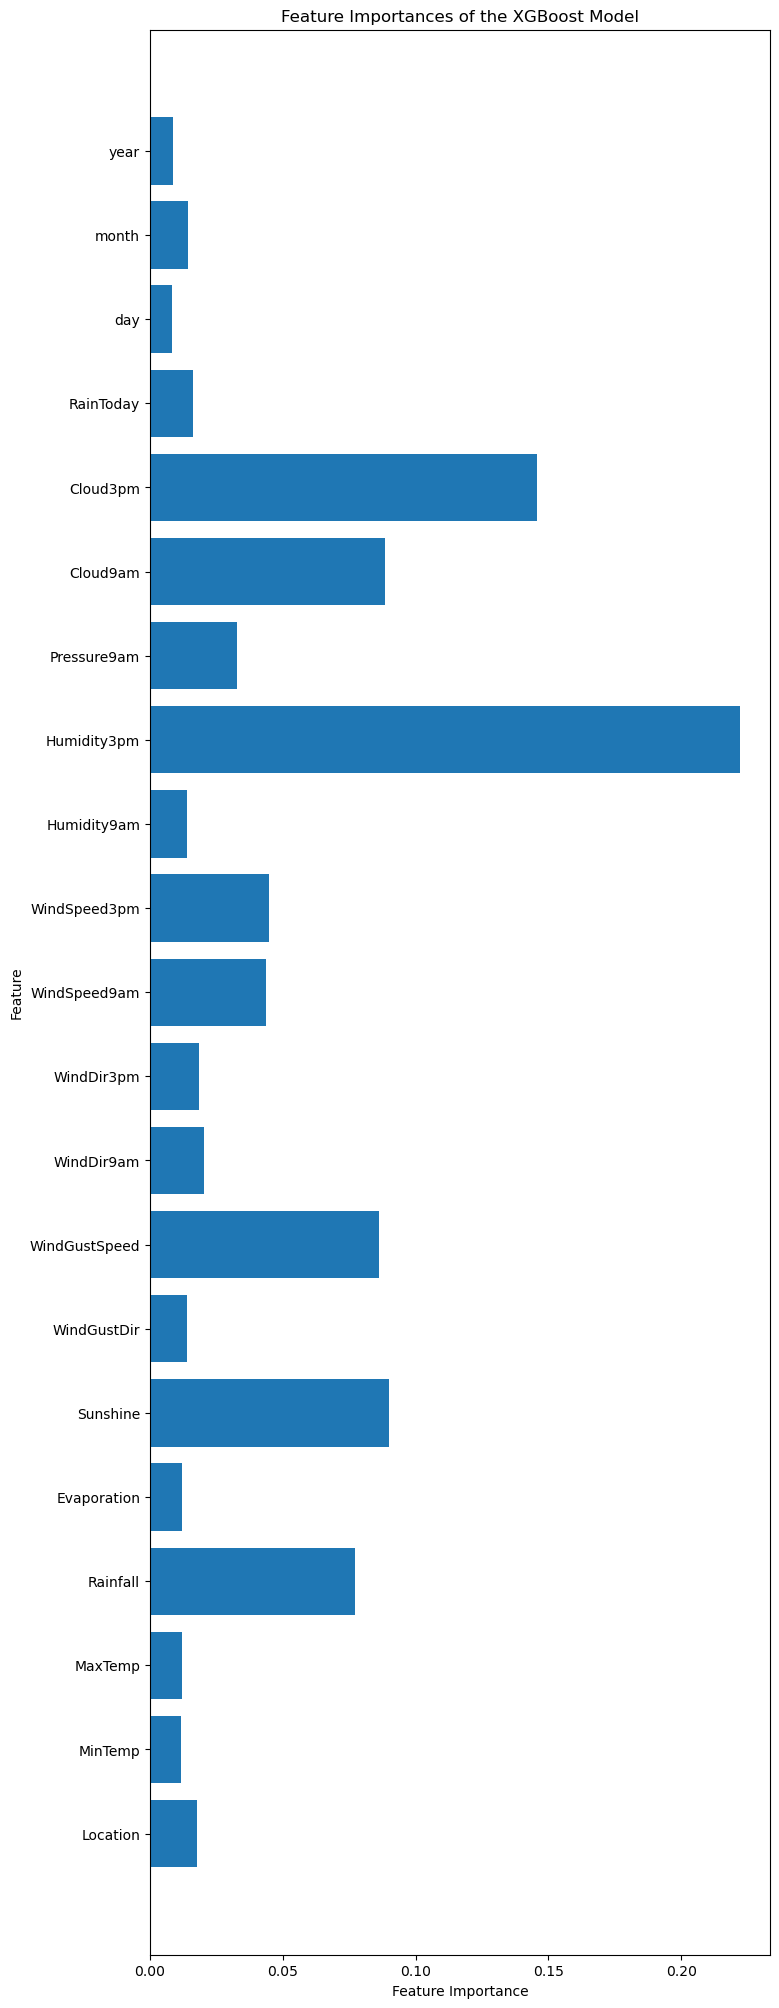

In [134]:
best_xgb = xgb

plt.figure(figsize=(8, 25))
plt.barh(range(best_xgb.n_features_in_), best_xgb.feature_importances_)
plt.yticks(np.arange(best_xgb.n_features_in_), X_train.columns.values)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of the XGBoost Model');

In [135]:
X.columns.value_counts().sum()

21

In [136]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainToday,day,month,year
0,20,-0.375202,0.177314,0.0,-0.249956,0.920113,5,0.706283,3,4,0.515137,1.037077,-0.617175,-0.450210,-0.915253,0.0,1.0,0,23,9,2012
1,24,-0.777402,0.734014,0.0,0.363263,1.205419,0,-0.419014,7,6,-0.299652,-1.053385,0.584551,-1.035740,0.928687,0.0,1.0,0,20,10,2009
2,1,-0.266918,0.006022,0.0,-0.795039,0.064195,1,-1.977118,15,1,-1.250239,-1.668227,0.699002,0.379292,0.611287,6.0,2.0,0,22,8,2012
3,0,1.156249,2.532582,0.0,-0.113685,1.462195,0,-0.245892,0,1,1.194127,-1.545259,0.012301,-1.865242,-1.595395,0.0,0.0,0,24,1,2013
4,10,-1.380701,-0.750519,0.0,-0.113685,0.577746,13,-0.851821,12,15,-0.571248,-0.315575,0.870677,-0.840564,1.956457,0.0,0.0,0,24,8,2014


In [137]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: RainTomorrow, dtype: int32